<a href="https://colab.research.google.com/github/Poonge1598/Detection-of-fraud-insurance-claims-in-vehicles-Binary-classification/blob/main/fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data=pd.read_csv("fraud_oracle.csv")

In [ ]:
data.head(10)

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision
5,Oct,4,Friday,Honda,Urban,Wednesday,Nov,1,Male,Single,...,5 years,21 to 25,No,No,External,3 to 5,no change,1 vehicle,1994,Collision
6,Feb,1,Saturday,Honda,Urban,Monday,Feb,3,Male,Married,...,7 years,36 to 40,No,No,External,1 to 2,no change,1 vehicle,1994,Collision
7,Nov,1,Friday,Honda,Urban,Tuesday,Mar,4,Male,Single,...,new,16 to 17,No,No,External,none,no change,1 vehicle,1994,Collision
8,Dec,4,Saturday,Honda,Urban,Wednesday,Dec,5,Male,Single,...,6 years,31 to 35,No,Yes,External,3 to 5,no change,1 vehicle,1994,Collision
9,Apr,3,Tuesday,Ford,Urban,Wednesday,Apr,3,Male,Married,...,more than 7,36 to 40,No,No,External,3 to 5,no change,1 vehicle,1994,All Perils


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data['Year'].count()

15420

In [ ]:
data.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'FraudFound_P', 'PolicyNumber', 'RepNumber',
       'Deductible', 'DriverRating', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year',
       'BasePolicy'],
      dtype='object')

**Exploratory Data Analysis - Extensive**

### Distribution for each variables

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

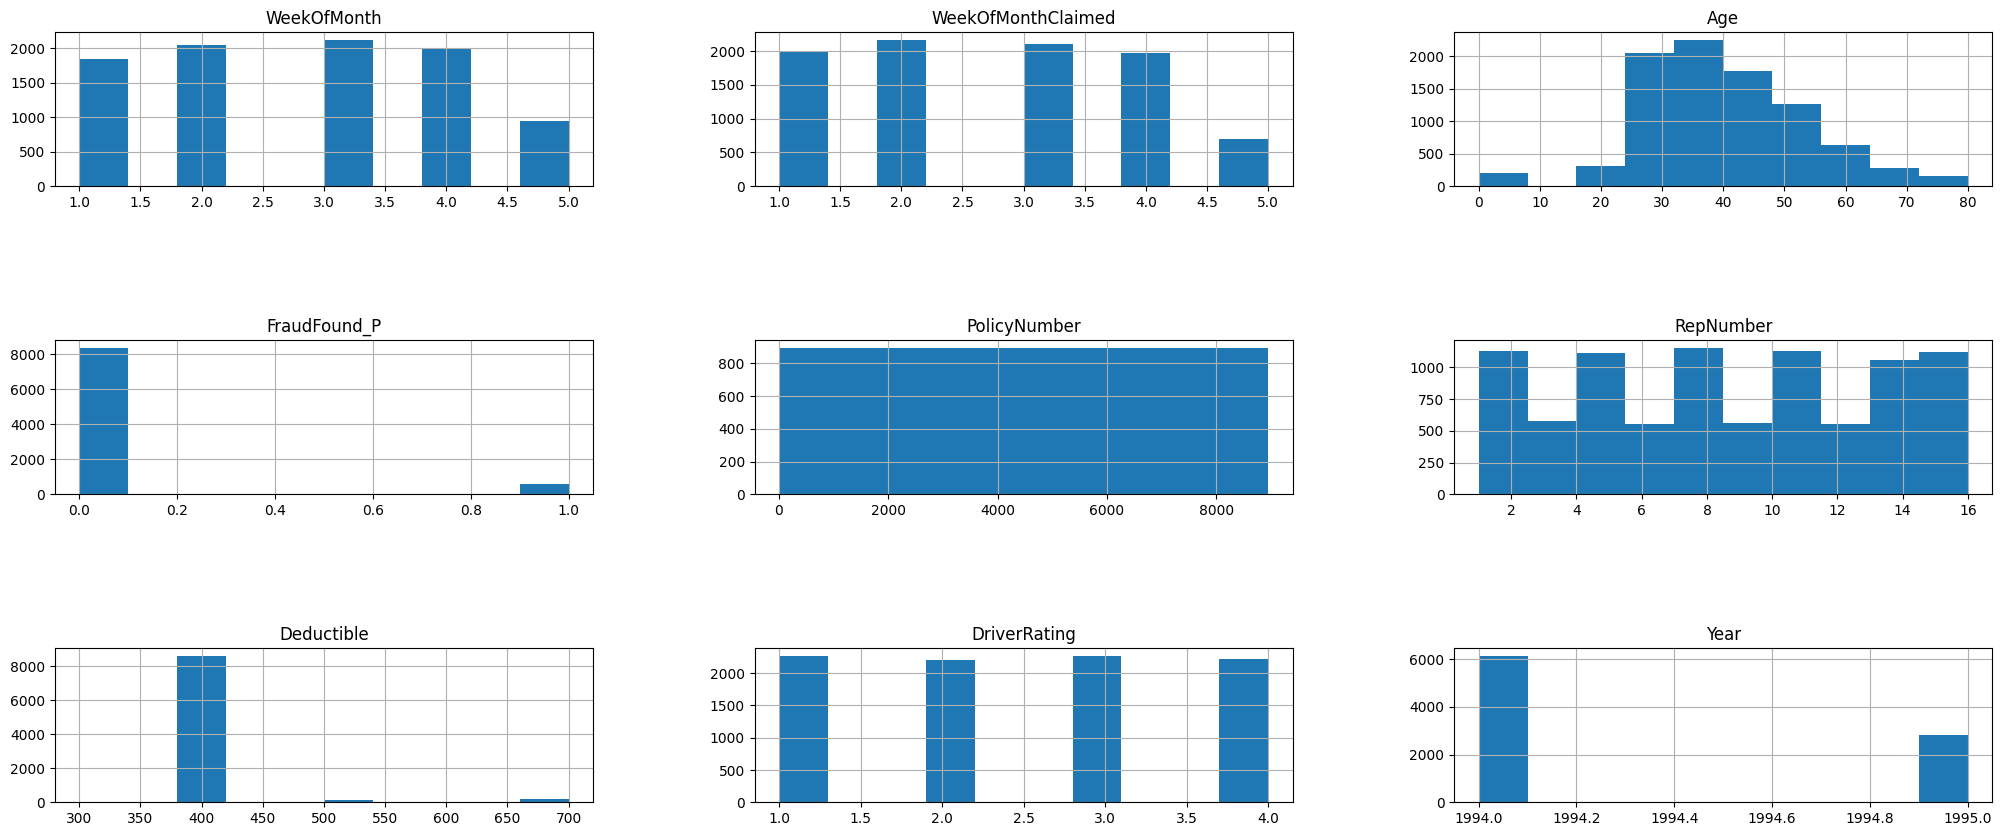

In [ ]:
data.hist(figsize=(25,10))
plt.subplots_adjust(hspace=1);

### Correlation between variables

In [ ]:
dataset_insurance=data[['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'PolicyNumber', 'RepNumber',
       'Deductible', 'DriverRating', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year',
       'BasePolicy','FraudFound_P']]

<ipython-input-8-87e28ea7e780>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matrix = np.triu(dataset_insurance.corr(),k=1)
<ipython-input-8-87e28ea7e780>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset_insurance.corr(),xticklabels=dataset_insurance.corr().columns.values,
<ipython-input-8-87e28ea7e780>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  yticklabels=dataset_insurance.corr().columns.values,annot=True,mask=matrix)


<Axes: >

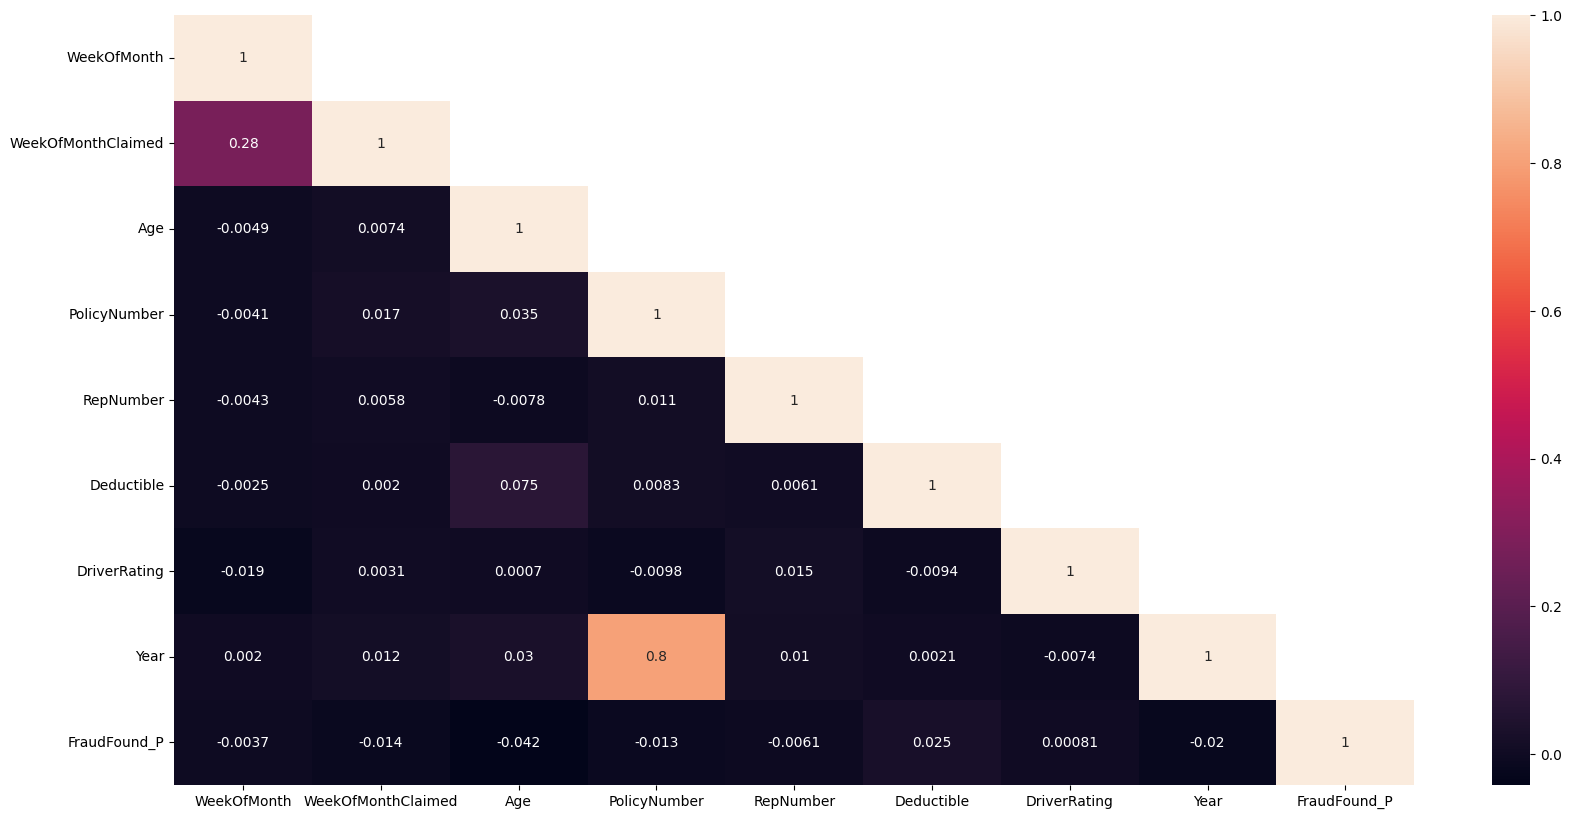

In [ ]:
import numpy as np
plt.figure(figsize=(20,10))
plt.tight_layout()
matrix = np.triu(dataset_insurance.corr(),k=1)
sns.heatmap(dataset_insurance.corr(),xticklabels=dataset_insurance.corr().columns.values,
            yticklabels=dataset_insurance.corr().columns.values,annot=True,mask=matrix)

### Visualizing how other variables change with respect to our response Fraudfound_P column

### Fraudfound_P vs month

Months of March,May,August and December have higher number of fraudulent transaction

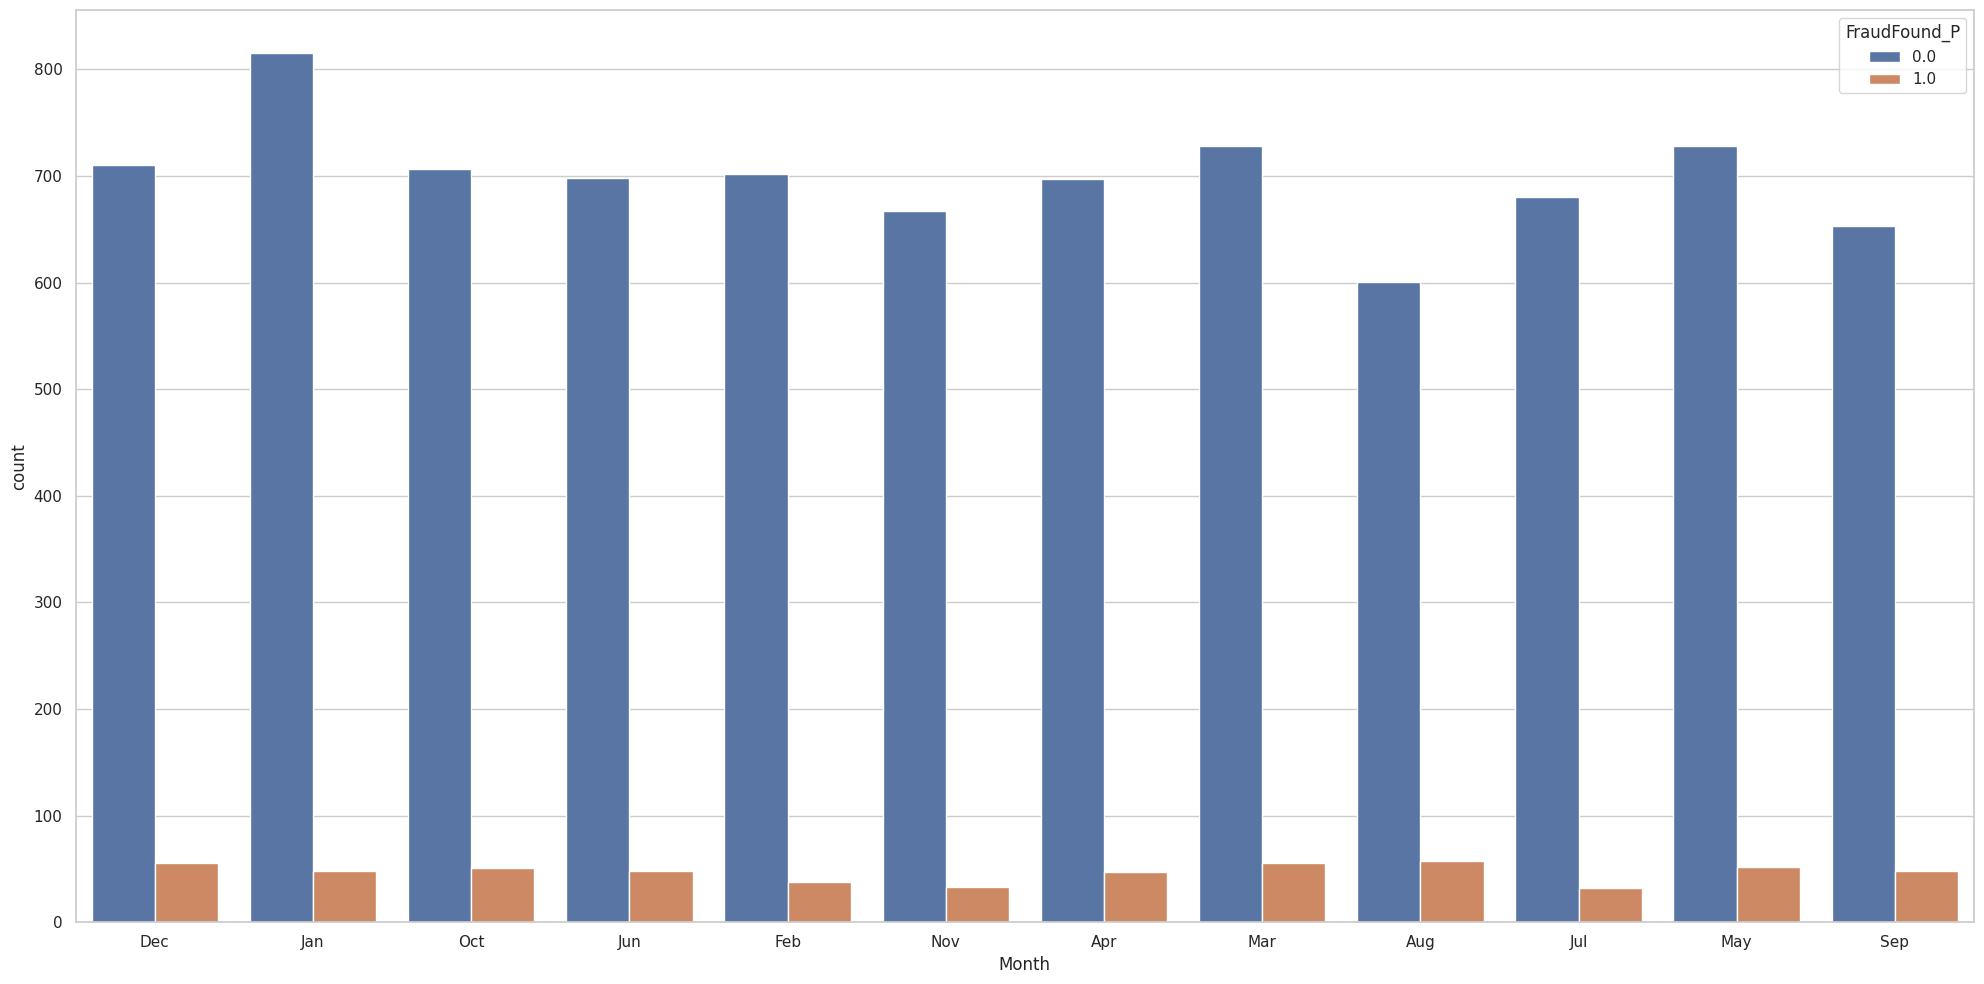

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(20,10))
sns.countplot(x='Month',data=dataset_insurance,hue='FraudFound_P')
plt.tight_layout()
plt.show()

### Fraudfound vs Make

Pontiac,Toyota and Honda have a higher number of fraudelent transaction

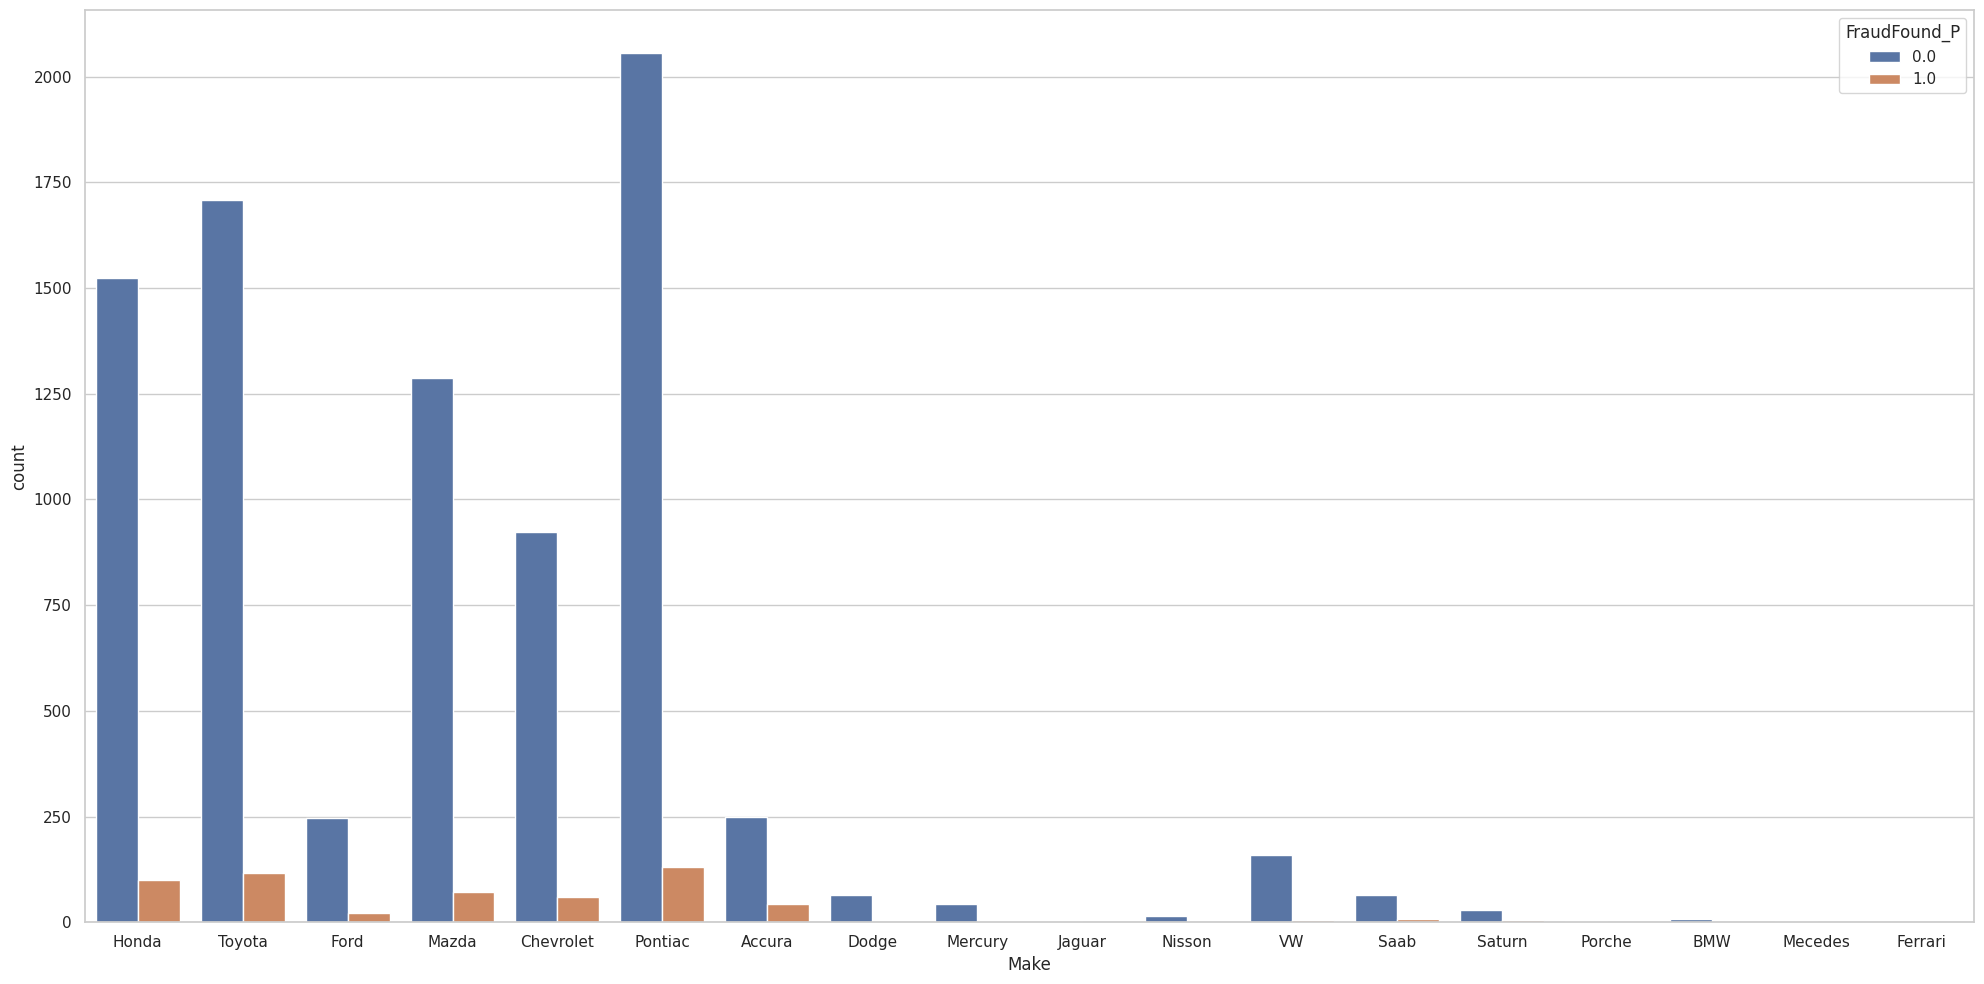

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(20,10))
sns.countplot(x='Make',data=dataset_insurance,hue='FraudFound_P')
plt.tight_layout()
plt.show()

### Gender vs Fraudent claims

<Axes: xlabel='FraudFound_P', ylabel='FraudFound_P'>

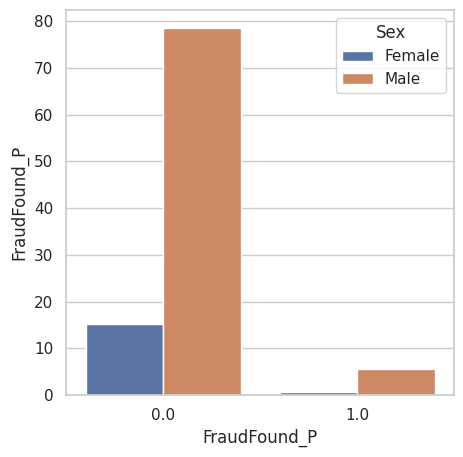

In [ ]:
plt.figure(figsize=(5,5))
sns.barplot(x='FraudFound_P',y='FraudFound_P',data=dataset_insurance,hue='Sex',
               estimator=lambda x: len(x) / len(dataset_insurance) * 100)


Majority of fraudulent calls are made from males and in general they major share of claims made.


### Week of month vs Fraudulent claims

Week 3,4 of month edges the other weeks for fraudent claims!

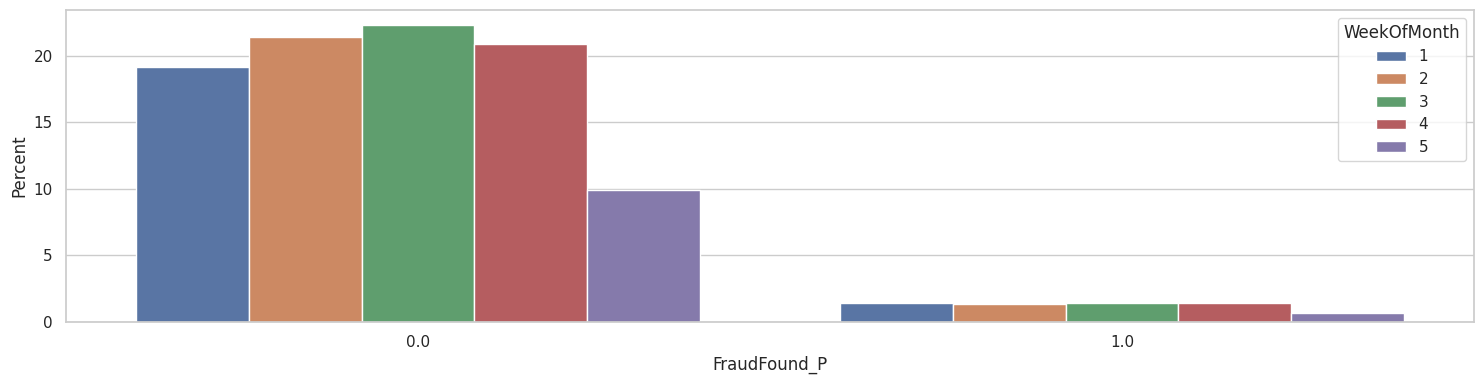

In [ ]:

plt.figure(figsize=(15,4))
ax=sns.barplot(data=dataset_insurance,x='FraudFound_P', y='FraudFound_P',hue='WeekOfMonth',
              estimator=lambda x: len(x) / len(dataset_insurance) * 100)
for container in ax.containers:
    ax.set(ylabel="Percent")
plt.tight_layout()
plt.show()

### Dayofweek vs Fraudulent claims

Fraudulent claims are higher nearer to the Weekends!

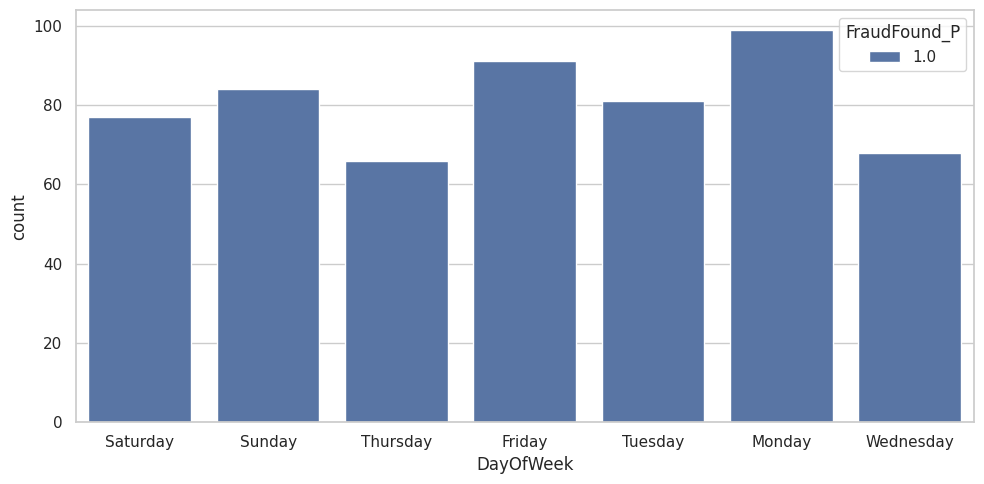

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(
    10,5))
sns.countplot(x='DayOfWeek',hue='FraudFound_P',data=dataset_insurance[dataset_insurance['FraudFound_P']==1.0])
plt.tight_layout()
plt.show()

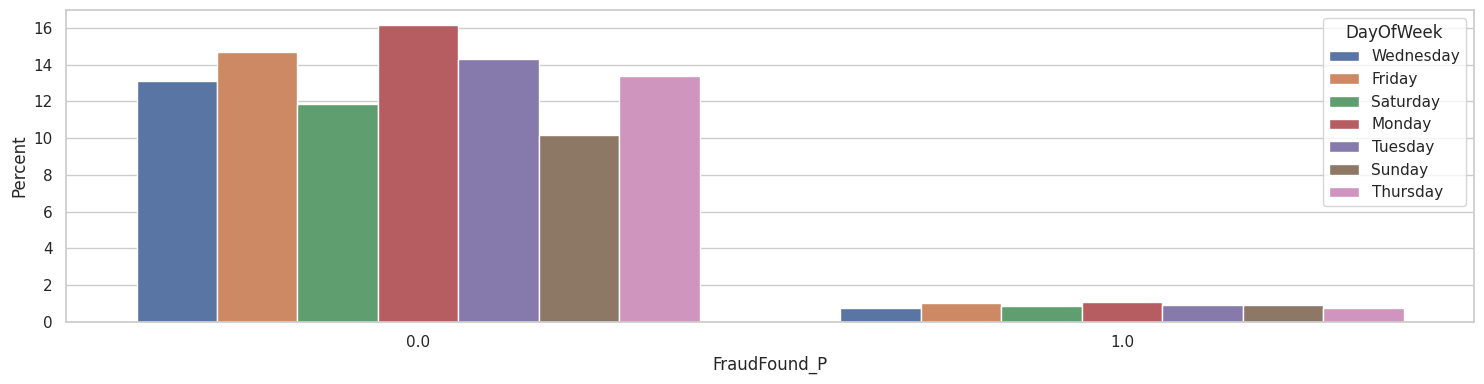

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(15,4))
ax=sns.barplot(data=dataset_insurance,x='FraudFound_P', y='FraudFound_P',hue='DayOfWeek',
              estimator=lambda x: len(x) / len(dataset_insurance) * 100)
for container in ax.containers:
    ax.set(ylabel="Percent")
plt.tight_layout()
plt.show()

### Age vs Fraudulent claims

Fraudelent claims are generally are made from persons ranging from age group 30-40

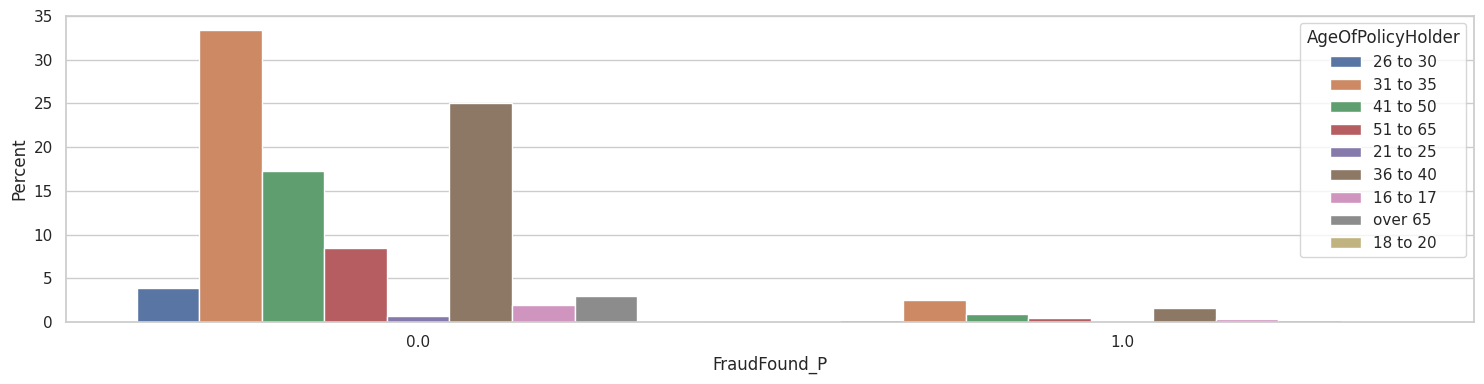

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(15,4))
ax=sns.barplot(data=dataset_insurance,x='FraudFound_P', y='FraudFound_P',hue='AgeOfPolicyHolder',
              estimator=lambda x: len(x) / len(dataset_insurance) * 100)
for container in ax.containers:
    ax.set(ylabel="Percent")
plt.tight_layout()
plt.show()

### Vehicle Category vs Fraudent Claims


Sedan vehicles (exspecially driven by males) have a high numbers of fraudulent claims

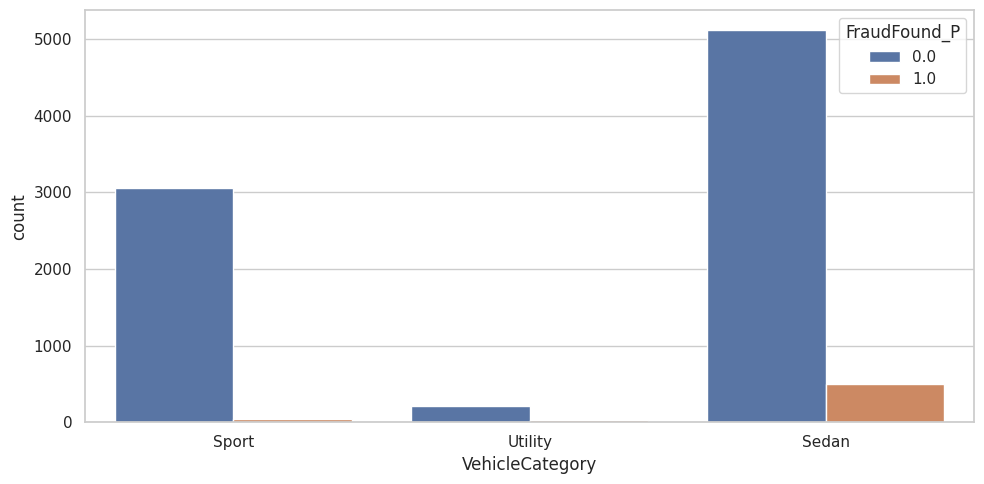

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(
    10,5))
sns.countplot(x='VehicleCategory',hue='FraudFound_P',data=dataset_insurance)
plt.tight_layout()
plt.show()

### Accident Area vs Fraudent Claims

As expected urban areas have more fraudulent claims compared to rural

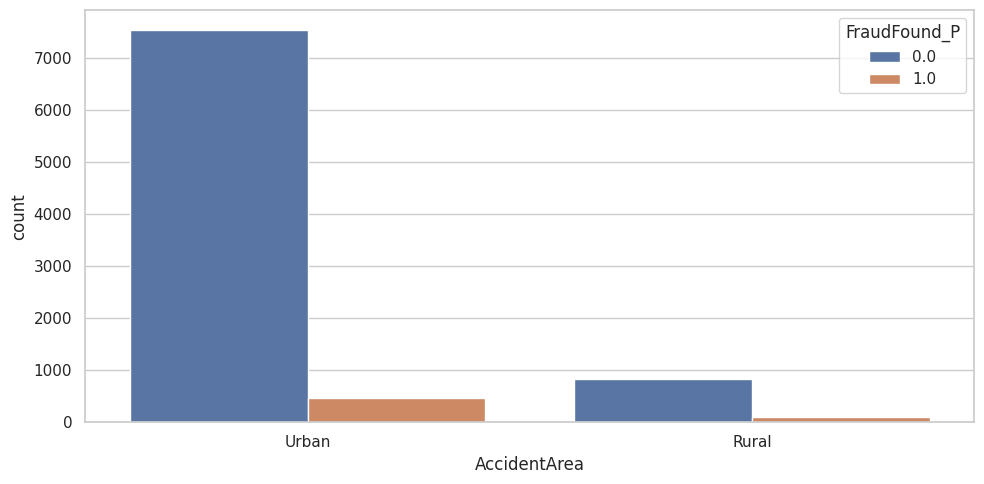

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(
    10,5))
sns.countplot(x='AccidentArea',hue='FraudFound_P',data=dataset_insurance)
plt.tight_layout()
plt.show()

### Vechicle price vs Fraudent Claim

Vehicle priced the least and most are the ones with more fraudulent claims

<Axes: xlabel='VehiclePrice', ylabel='count'>

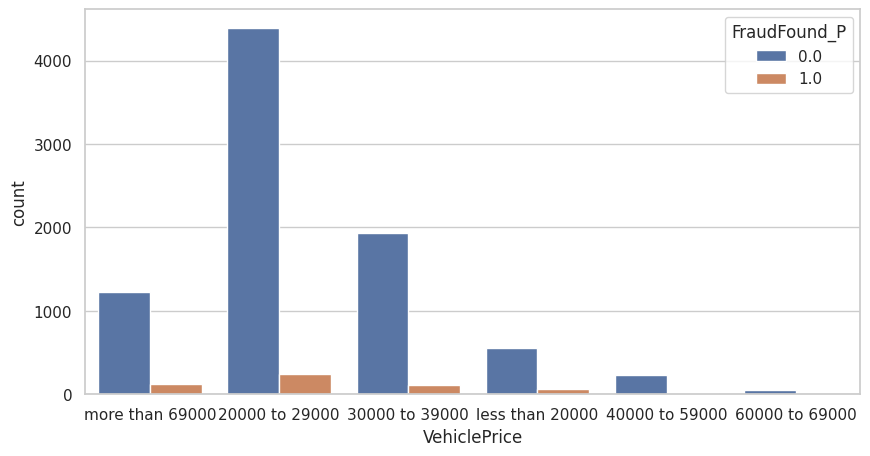

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(
    10,5))
sns.countplot(x='VehiclePrice',hue='FraudFound_P',data=dataset_insurance)

### Past number of claims vs Fraudulent claims

As expected, Fraudent claims are more when are processed for the first time/2-4 claims in the past

<Axes: xlabel='PastNumberOfClaims', ylabel='count'>

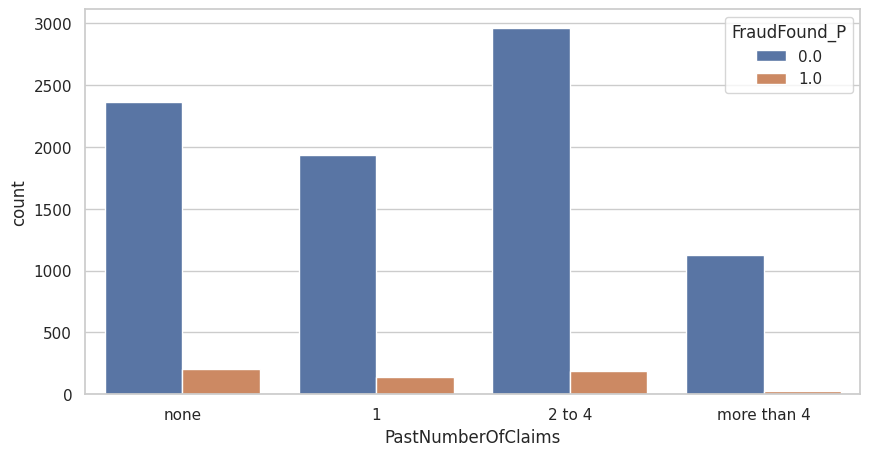

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(
    10,5))
sns.countplot(x='PastNumberOfClaims',hue='FraudFound_P',data=dataset_insurance)


### Age of Vechicle vs Fraudulent Claims

Age of vehicle between 7 or more years have encountered many Fraudulent claims


<Axes: xlabel='AgeOfVehicle', ylabel='count'>

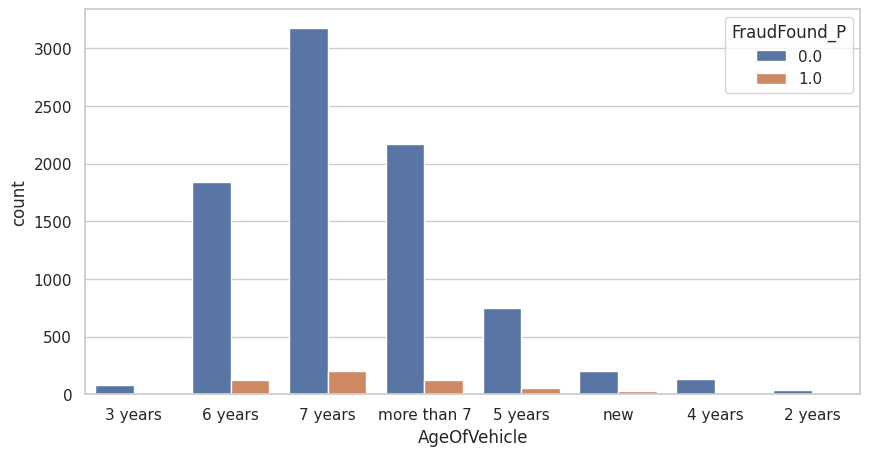

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(
    10,5))
sns.countplot(x='AgeOfVehicle',hue='FraudFound_P',data=dataset_insurance)

### Witness present vs Fraudulent claims

As expected, if a witness is present the fraudulent claims are way lesser(negligible)

<Axes: xlabel='WitnessPresent', ylabel='count'>

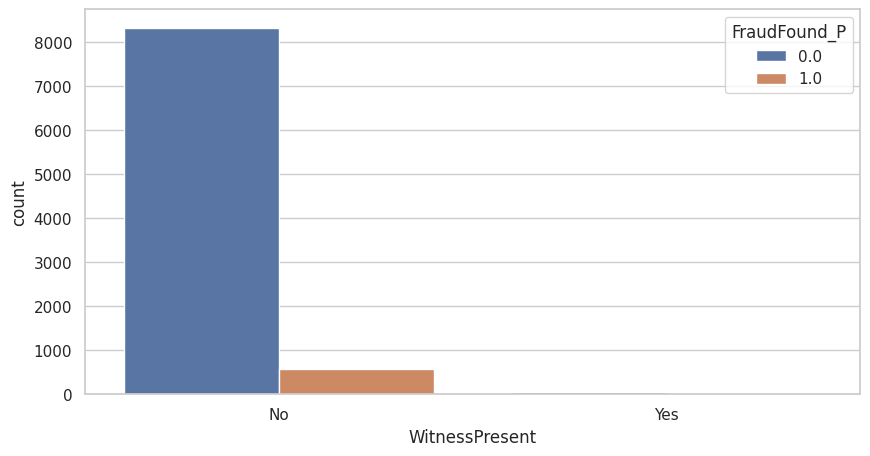

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(
    10,5))
sns.countplot(x='WitnessPresent',hue='FraudFound_P',data=dataset_insurance)

### Police report failed vs Fraudulent Claims

As expected, when there is no official record of the incident claims become more suspicious!

<Axes: xlabel='PoliceReportFiled', ylabel='count'>

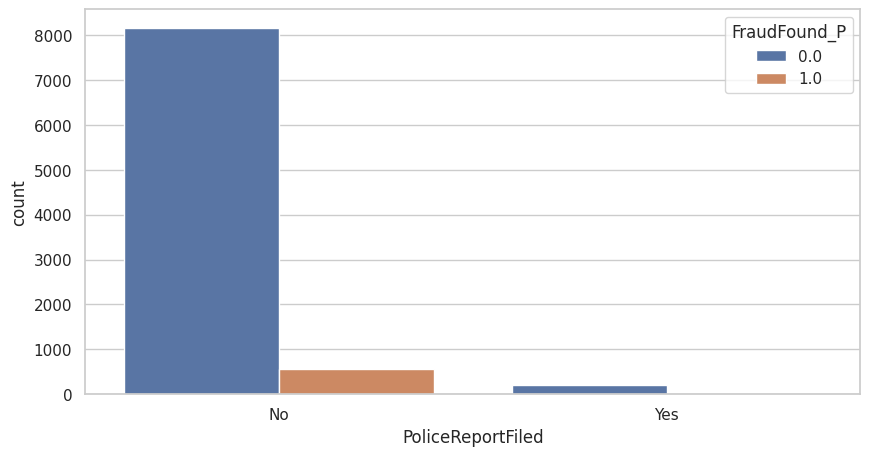

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(
    10,5))
sns.countplot(x='PoliceReportFiled',hue='FraudFound_P',data=dataset_insurance)


### Type of policy vs Fraudulent claims

As expected, the fraudulent claims are received more from 'All perils' insurance,  due to the broader and comprehensive scope of coverage it provides

<Axes: xlabel='BasePolicy', ylabel='count'>

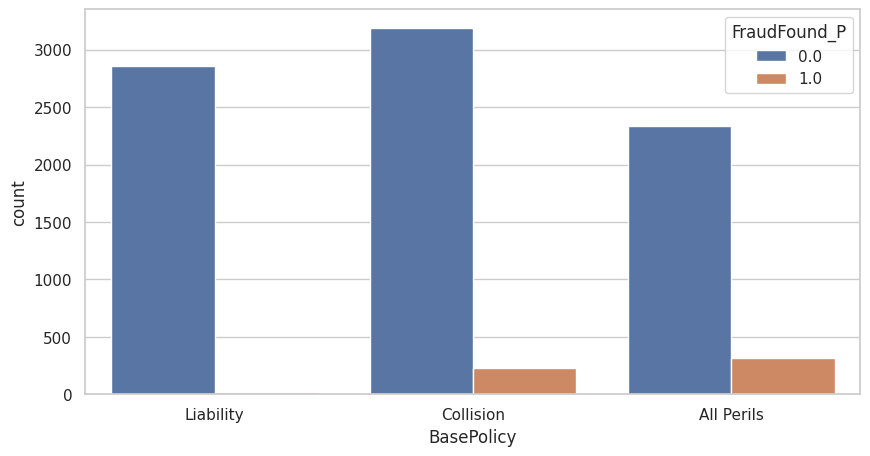

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(
    10,5))
sns.countplot(x='BasePolicy',hue='FraudFound_P',data=dataset_insurance)

- - - - - - - - - - - - - - - - - - - - - - - - - - -

**Removing the columns 'Year' and 'PolicyNumber' since PolicyNumber,
in fact, is just an ID column; on the other hand, Year has just three values (1994, 1995, 1996) so it will not be significant
in a model. Moreover, we did not want our model to be historical based, as – theoretically – it would serve for new
observations without considering the year of them**

In [ ]:
data.drop(['PolicyNumber','Year'],axis=1,inplace=True)

**There are no missing/null values in this dataset as indicated by the results**

In [ ]:
data.isna().any()

Month                   False
WeekOfMonth             False
DayOfWeek               False
Make                    False
AccidentArea            False
DayOfWeekClaimed        False
MonthClaimed            False
WeekOfMonthClaimed      False
Sex                     False
MaritalStatus           False
Age                     False
Fault                   False
PolicyType              False
VehicleCategory         False
VehiclePrice            False
FraudFound_P            False
RepNumber               False
Deductible              False
DriverRating            False
Days_Policy_Accident    False
Days_Policy_Claim       False
PastNumberOfClaims      False
AgeOfVehicle            False
AgeOfPolicyHolder       False
PoliceReportFiled       False
WitnessPresent          False
AgentType               False
NumberOfSuppliments     False
AddressChange_Claim     False
NumberOfCars            False
BasePolicy              False
dtype: bool

In [ ]:
data.isnull().any()

Month                   False
WeekOfMonth             False
DayOfWeek               False
Make                    False
AccidentArea            False
DayOfWeekClaimed        False
MonthClaimed            False
WeekOfMonthClaimed      False
Sex                     False
MaritalStatus           False
Age                     False
Fault                   False
PolicyType              False
VehicleCategory         False
VehiclePrice            False
FraudFound_P            False
RepNumber               False
Deductible              False
DriverRating            False
Days_Policy_Accident    False
Days_Policy_Claim       False
PastNumberOfClaims      False
AgeOfVehicle            False
AgeOfPolicyHolder       False
PoliceReportFiled       False
WitnessPresent          False
AgentType               False
NumberOfSuppliments     False
AddressChange_Claim     False
NumberOfCars            False
BasePolicy              False
dtype: bool

In [ ]:
X=data.drop(['FraudFound_P'],axis=1)

In [ ]:
Y=data['FraudFound_P']

**Retrieving columns which are categorical and numerical**

In [ ]:
def categorical(df):
  return df.select_dtypes(include=['object', 'category']).columns.tolist()

def numerical(df):
  return df.select_dtypes(include=['int','float']).columns.tolist()

In [ ]:
categorical_columns=categorical(X)
print(categorical_columns)

['Month', 'DayOfWeek', 'Make', 'AccidentArea', 'DayOfWeekClaimed', 'MonthClaimed', 'Sex', 'MaritalStatus', 'Fault', 'PolicyType', 'VehicleCategory', 'VehiclePrice', 'Days_Policy_Accident', 'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle', 'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType', 'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'BasePolicy']


In [ ]:
numerical_columns=numerical(X)
print(numerical_columns)

['WeekOfMonth', 'WeekOfMonthClaimed', 'Age', 'RepNumber', 'Deductible', 'DriverRating']


In [ ]:
len(categorical_columns)

24

In [ ]:
len(numerical_columns)

6

In [ ]:
len(X.columns)

30

**Device a pipeline for preprocessing encoding the categorical features and standardizing the numerical ones**

In [ ]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
from sklearn.compose import ColumnTransformer

In [ ]:
categorical_transformer=Pipeline(steps=[('onehot',OneHotEncoder(handle_unknown='ignore'))])

In [ ]:
numerical_transformer=Pipeline(steps=[('scalar',StandardScaler())])

In [ ]:
preprocessor=ColumnTransformer(transformers=[('cat',categorical_transformer,categorical_columns),('num',numerical_transformer,numerical_columns)])

In [ ]:
X_processed=preprocessor.fit_transform(X)

In [ ]:
X_processed

<15420x146 sparse matrix of type '<class 'numpy.float64'>'
	with 462600 stored elements in Compressed Sparse Row format>

In [ ]:
categorical_column_names = preprocessor.named_transformers_['cat'] .named_steps['onehot'].get_feature_names_out(input_features=categorical_columns)

In [ ]:
X_df=pd.DataFrame(X_processed.toarray(),columns=list(categorical_column_names)+numerical_columns)

In [ ]:
Y_df=pd.DataFrame(Y,columns=['FraudFound_P'])

**Splitting the data set into training and validation set**

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

In [ ]:
split=StratifiedShuffleSplit(n_splits=1,test_size=0.3,random_state=121)

In [ ]:
for train_index,test_index in split.split(X_df,Y_df):
  X_train,X_test=X_df.iloc[train_index],X_df.iloc[test_index]
  Y_train,Y_test=Y_df.iloc[train_index],Y_df.iloc[test_index]

**Using Decision Tree and Random Forest algorithms, we will identify the most important attributes from the dataset. These selected features will be used to create a model, and its performance will be compared with the model using all attributes. This analysis will help us determine which model performs better in predicting the target variable.**

**Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
decision_tree=DecisionTreeClassifier(random_state=87, ccp_alpha=0.0004)

In [ ]:
decision_tree.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0004, random_state=87)

In [ ]:
import graphviz
from sklearn import tree

In [ ]:
dot_data = tree.export_graphviz(decision_tree, out_file=None,feature_names=X_train.columns,class_names=Y_train['FraudFound_P'].unique().astype(str),filled=True, rounded=True,special_characters=True)

In [ ]:
graph=graphviz.Source(dot_data)
graph.render("decision_tree",view=True,format='png')

'decision_tree.png'

**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
random_classifier=RandomForestClassifier(n_estimators=500, random_state=21)

In [ ]:
random_classifier.fit(X_train,np.array(Y_train).ravel())

RandomForestClassifier(n_estimators=500, random_state=21)

In [ ]:
impurity_importance=random_classifier.feature_importances_

In [ ]:
impurity_series=pd.Series(impurity_importance,index=X_train.columns)

In [ ]:
sorted_impurity=impurity_series.sort_values(ascending=False)[:20]

In [ ]:
sorted_impurity

Age                            0.060670
RepNumber                      0.056026
WeekOfMonth                    0.035621
WeekOfMonthClaimed             0.034964
DriverRating                   0.032116
Fault_Policy Holder            0.017795
Fault_Third Party              0.017473
NumberOfSuppliments_none       0.013903
PastNumberOfClaims_none        0.013625
PastNumberOfClaims_2 to 4      0.012955
DayOfWeekClaimed_Monday        0.012946
PastNumberOfClaims_1           0.012750
AgeOfVehicle_7 years           0.012685
VehiclePrice_20000 to 29000    0.012162
DayOfWeekClaimed_Wednesday     0.012031
DayOfWeekClaimed_Tuesday       0.011825
AgeOfVehicle_6 years           0.011636
Make_Pontiac                   0.011451
DayOfWeek_Monday               0.011371
Make_Toyota                    0.011195
dtype: float64

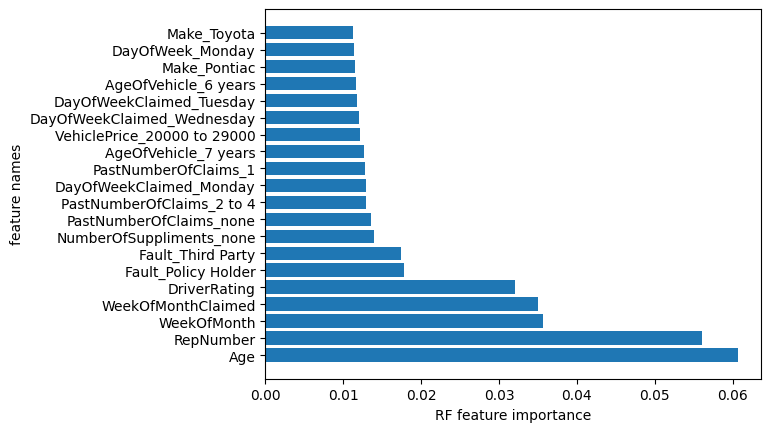

In [ ]:
plt.barh(sorted_impurity.index,sorted_impurity.values)
plt.xlabel('RF feature importance')
plt.ylabel('feature names')
plt.show()

In [ ]:
from sklearn.inspection import permutation_importance

In [ ]:
permutation=permutation_importance(random_classifier,X_train,Y_train["FraudFound_P"],n_repeats=10,random_state=32)

In [ ]:
permutation_score=permutation.importances_mean

In [ ]:
sorted_index=permutation_score.argsort()

In [ ]:
sorted_index

array([ 72,  26,  27,  33,  40, 116,  48, 110, 109, 108, 121,  63,  74,
        75,  76,  77,  95,  80,  87,  88,  90, 100,  23,  93, 130, 132,
       136, 122,  20, 133, 135,  92,  44, 129,  22, 117,  37, 119,  61,
        94,  89,  31, 107,  29, 120,  64,  62,  65,   5, 131,  66,  43,
        84,  35,  91,  78, 105, 118,  96, 111, 101, 115,  59, 127,  30,
        81,  54,  24,   9, 125,  45,  11, 144,  58, 124, 113,  82, 102,
        52,  42,  51,  83,  34,   1,  85,  10,  32, 112,   2,  12,   3,
        46,  49,  13,   0,  18,   8, 103,  53, 138, 126, 114,  21, 106,
        47,  17,  60, 123, 134,   4,  73,  16,   6,  97,  36,  55,  56,
        28,  71,  39,  14,  86,  15,  19,  98,   7,  57,  99, 104,  41,
        70,  25,  38,  79,  50, 139, 128, 137, 140, 145, 141,  69, 143,
       142,  67,  68])

In [ ]:
permutation_df=pd.DataFrame(permutation.importances[sorted_index].T,columns=X_train.columns[sorted_index])

In [ ]:
perm_score=permutation_df.iloc[:,-20:]

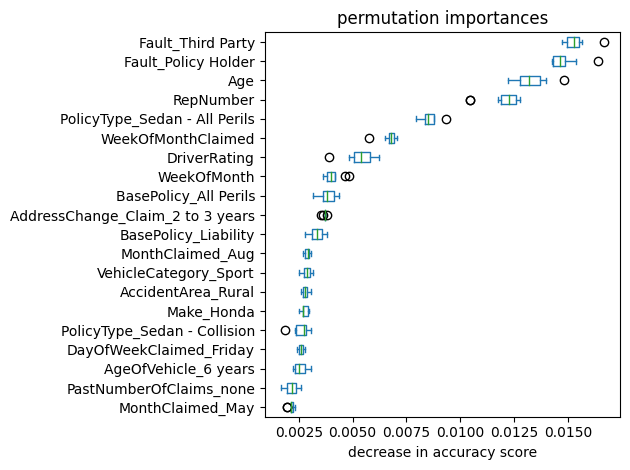

In [ ]:
ax=perm_score.plot.box(vert=False,whis=1)
ax.set_xlabel("decrease in accuracy score")
ax.set_title("permutation importances")
ax.figure.tight_layout()
plt.show()

**The results obtained differ between them but have some similarities: we can deduce that the features with higher
importance are Age, Fault, RepNumber, WeekOfMonth, WeekOfMonthClaimed, DriverRating, and BasePolicy

To conclude this part, we repeated the preprocessing using just a part of the features (Age, Fault, Make, PolicyType,
BasePolicy, AddressChange_Claim, MonthClaimed, RepNumber, AgeOfPolicyHolder, Days_Policy_Claim, NumberOfCars,
DriverRating, Deductible, WeekOfMonth, WeekOfMonthClaimed ).**

**Extracting the selected features -- will be used in further modeling**

In [ ]:
selected_X=X[["Age", "Fault", "Make", "PolicyType", "BasePolicy", "AddressChange_Claim", "MonthClaimed", "RepNumber", "AgeOfPolicyHolder", "Days_Policy_Claim", "NumberOfCars", "DriverRating", "Deductible", "WeekOfMonth", "WeekOfMonthClaimed" ]]

In [ ]:
selected_X

,Age,Fault,Make,PolicyType,BasePolicy,AddressChange_Claim,MonthClaimed,RepNumber,AgeOfPolicyHolder,Days_Policy_Claim,NumberOfCars,DriverRating,Deductible,WeekOfMonth,WeekOfMonthClaimed
0,21,Policy Holder,Honda,Sport - Liability,Liability,1 year,Jan,12,26 to 30,more than 30,3 to 4,1,300,5,1
1,34,Policy Holder,Honda,Sport - Collision,Collision,no change,Jan,15,31 to 35,more than 30,1 vehicle,4,400,3,4
2,47,Policy Holder,Honda,Sport - Collision,Collision,no change,Nov,7,41 to 50,more than 30,1 vehicle,3,400,5,2
3,65,Third Party,Toyota,Sedan - Liability,Liability,no change,Jul,4,51 to 65,more than 30,1 vehicle,2,400,2,1
4,27,Third Party,Honda,Sport - Collision,Collision,no change,Feb,3,31 to 35,more than 30,1 vehicle,1,400,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15415,35,Policy Holder,Toyota,Sedan - Collision,Collision,no change,Nov,5,31 to 35,more than 30,1 vehicle,4,400,4,5
15416,30,Policy Holder,Pontiac,Sedan - Liability,Liability,no change,Dec,11,31 to 35,more than 30,3 to 4,3,400,5,1
15417,24,Policy Holder,Toyota,Sedan - Collision,Collision,no change,Dec,4,26 to 30,more than 30,1 vehicle,4,400,5,1
15418,34,Third Party,Toyota,Sedan - All Perils,All Perils,no change,Dec,6,31 to 35,more than 30,1 vehicle,4,400,1,2


In [ ]:
categorical_sel_col=categorical(selected_X)

In [ ]:
numerical_sel_col=numerical(selected_X)

In [ ]:
sel_preprocessor=ColumnTransformer([('cat_sel',categorical_transformer,categorical_sel_col),('num_sel',numerical_transformer,numerical_sel_col)])

In [ ]:
X_processed_sel=sel_preprocessor.fit_transform(selected_X)

In [ ]:
categorical_sel_column_names = sel_preprocessor.named_transformers_['cat_sel'] .named_steps['onehot'].get_feature_names_out(input_features=categorical_sel_col)

In [ ]:
X_sel_df=pd.DataFrame(X_processed_sel.toarray(),columns=list(categorical_sel_column_names)+numerical_sel_col)

In [ ]:
Y_sel_df=pd.DataFrame(Y,columns=['FraudFound_P'])

In [ ]:
for train_index,test_index in split.split(X_sel_df,Y_sel_df):
  X_train_sel,X_test_sel=X_sel_df.iloc[train_index],X_sel_df.iloc[test_index]
  Y_train_sel,Y_test_sel=Y_sel_df.iloc[train_index],Y_sel_df.iloc[test_index]

**Modeling**

**Logisitic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn.metrics import accuracy_score,precision_recall_fscore_support,ConfusionMatrixDisplay,confusion_matrix,RocCurveDisplay,balanced_accuracy_score,f1_score,accuracy_score,recall_score


In [ ]:
log_reg=LogisticRegression(max_iter=1000)

In [ ]:
log_reg.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=1000)

In [ ]:
Y_pred=log_reg.predict(X_test)

In [ ]:
precision, recall, fscore, support = precision_recall_fscore_support(np.array(Y_test).ravel(), Y_pred, average=None)


In [ ]:
for class_label in range(2):
    print(f"Class {class_label} - Precision: {precision[class_label]}, Recall: {recall[class_label]}, F1-score: {fscore[class_label]}, Support: {support[class_label]}")


Class 0 - Precision: 0.9402079722703639, Recall: 0.9979305587491377, F1-score: 0.9682097044060234, Support: 4349
Class 1 - Precision: 0.1, Recall: 0.0036101083032490976, F1-score: 0.006968641114982579, Support: 277


In [ ]:
print(f"youden score:{balanced_accuracy_score(Y_test,Y_pred)}")

youden score:0.5007703335261934


In [ ]:
print("%.6f"%f1_score(Y_test,Y_pred))

0.006969


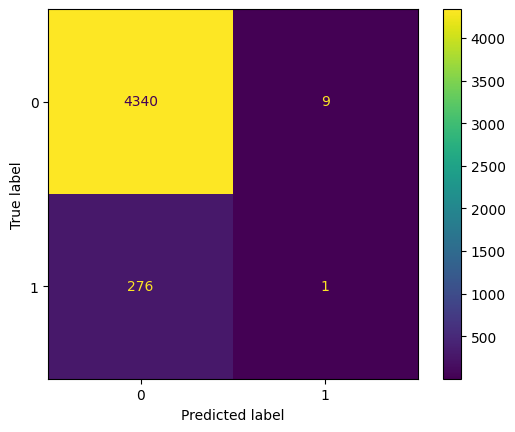

In [ ]:
ConfusionMatrixDisplay(confusion_matrix(Y_test,Y_pred)).plot()
plt.show()

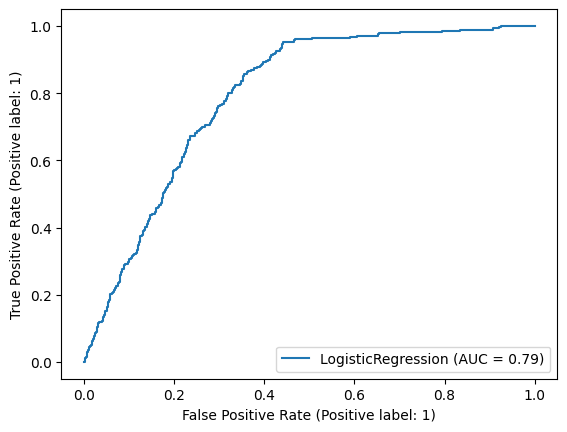

In [ ]:
RocCurveDisplay.from_estimator(log_reg,X_test,Y_test)
plt.show()

**Threshold Optmization**

**Reason**

1.   Due to imbalance present in the dataset , F1-score,youden score and other metrics for class 1(Fraud) are found to be low



In [ ]:
prob=log_reg.predict_proba(X_test)

In [ ]:
threshold=[]

In [ ]:
for i in range(5,105,5):
  threshold.append((i/100))

In [ ]:
def best_f1(prob):
  f1=[]
  for i in threshold:
    Y_pred_cal=[]
    for j in prob[:,1:]:
      if j>i:
        Y_pred_cal.append(1)
      else:
        Y_pred_cal.append(0)
    f1.append(f1_score(Y_test,Y_pred_cal))
  return f1.index(max(f1)),max(f1)

In [ ]:
def best_youden(prob):
  youden=[]
  for i in threshold:
    Y_pred_cal=[]
    for j in prob[:,1:]:
      if j>i:
        Y_pred_cal.append(1)
      else:
        Y_pred_cal.append(0)
    youden.append(balanced_accuracy_score(Y_test,Y_pred_cal))
  return youden.index(max(youden)),max(youden)

In [ ]:
def prediction(prob,threshold):
  Y_pred_cal=[]
  for i in prob[:,1:]:
    if i>threshold:
      Y_pred_cal.append(1)
    else:
      Y_pred_cal.append(0)
  return Y_pred_cal


In [ ]:
f1_threshold_index,best_f1_score=best_f1(prob)

In [ ]:
pred=prediction(prob,threshold[f1_threshold_index])

In [ ]:
accuracy_score(Y_test,pred)

0.7607003891050583

In [ ]:
print(f"F1 optmized --> threshold:{threshold[f1_threshold_index]},best f1 score:{best_f1_score},accuracy:{accuracy_score(Y_test,prediction(prob,threshold[f1_threshold_index]))},\
youden score:{balanced_accuracy_score(Y_test,prediction(prob,threshold[f1_threshold_index]))},recall:{recall_score(Y_test,prediction(prob,threshold[f1_threshold_index]))}")

F1 optmized --> threshold:0.1,best f1 score:0.2484725050916497,accuracy:0.7607003891050583,youden score:0.7138613549070992,recall:0.6606498194945848


In [ ]:
youden_threshold_index,best_youden_score=best_youden(prob)

In [ ]:
print(f"Youden optmized --> threshold:{threshold[youden_threshold_index]},best youden score:{best_youden_score},accuracy:{accuracy_score(Y_test,prediction(prob,threshold[youden_threshold_index]))},\
f1 score {f1_score(Y_test,prediction(prob,threshold[youden_threshold_index]))},recall:{recall_score(Y_test_sel,prediction(prob,threshold[youden_threshold_index]))}")

Youden optmized --> threshold:0.05,best youden score:0.7444111389563807,accuracy:0.6242974492001729,f1 score 0.2192273135669362,recall:0.8808664259927798


In [ ]:
confusion_matrix(Y_test,prediction(prob,threshold[youden_threshold_index]))

array([[2644, 1705],
       [  33,  244]])

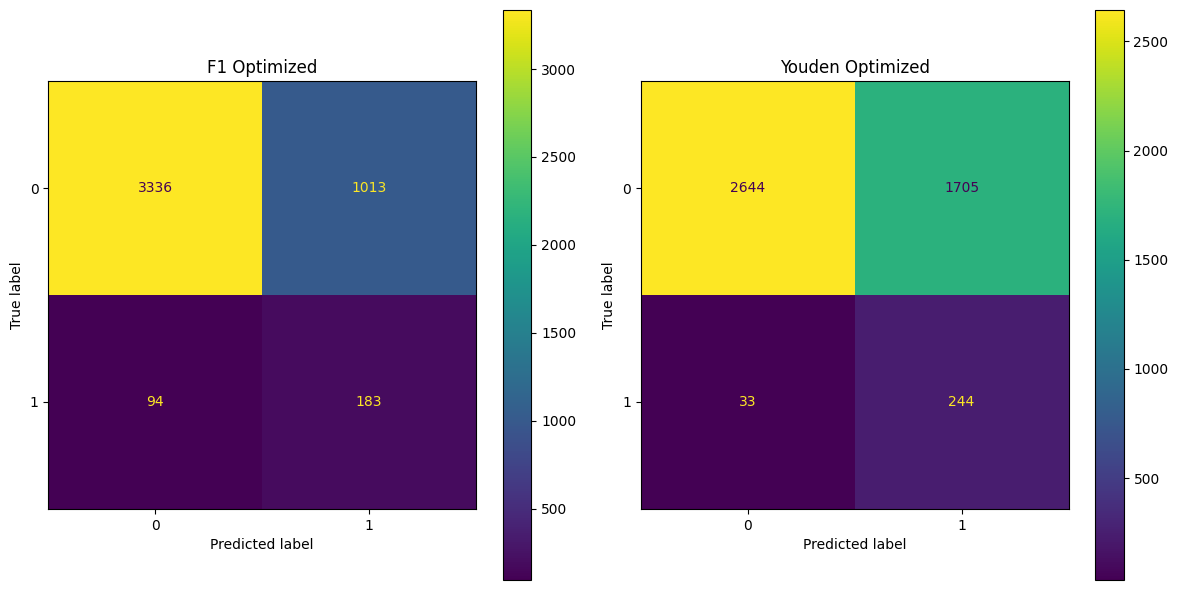

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

ConfusionMatrixDisplay(confusion_matrix(Y_test,prediction(prob,threshold[f1_threshold_index]))).plot(ax=axs[0])
axs[0].set_title("F1 Optimized")

ConfusionMatrixDisplay(confusion_matrix(Y_test,prediction(prob,threshold[youden_threshold_index]))).plot(ax=axs[1])
axs[1].set_title("Youden Optimized")

plt.tight_layout()
plt.show()

**With Selected features**

In [ ]:
log_reg_sel=LogisticRegression(max_iter=1000)

In [ ]:
log_reg_sel.fit(X_train_sel,np.array(Y_train_sel).ravel())

LogisticRegression(max_iter=1000)

In [ ]:
Y_pred_sel=log_reg_sel.predict(X_test_sel)

In [ ]:
precision, recall, fscore, support = precision_recall_fscore_support(np.array(Y_test_sel).ravel(), Y_pred_sel, average=None)


In [ ]:
for class_label in range(2):
    print(f"Class {class_label} - Precision: {precision[class_label]}, Recall: {recall[class_label]}, F1-score: {fscore[class_label]}, Support: {support[class_label]}")


Class 0 - Precision: 0.940220922677063, Recall: 0.9981604966659002, F1-score: 0.9683247825117111, Support: 4349
Class 1 - Precision: 0.1111111111111111, Recall: 0.0036101083032490976, F1-score: 0.006993006993006993, Support: 277


In [ ]:
print(f"youden score:{balanced_accuracy_score(Y_test_sel,Y_pred_sel)}")

youden score:0.5008853024845746


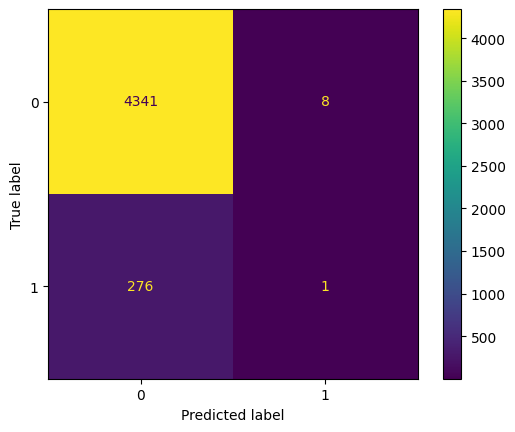

In [ ]:
ConfusionMatrixDisplay(confusion_matrix(Y_test_sel,Y_pred_sel)).plot()
plt.show()

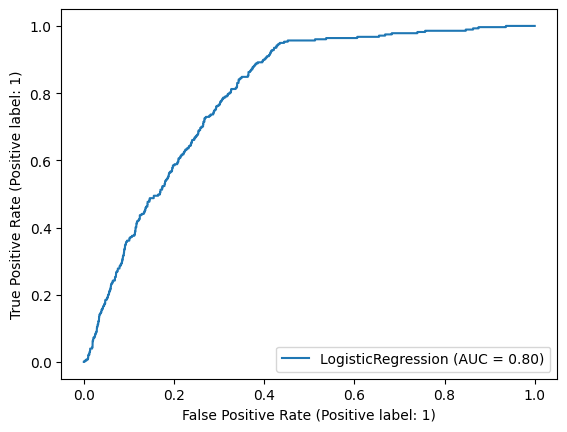

In [ ]:
RocCurveDisplay.from_estimator(log_reg_sel,X_test_sel,Y_test_sel)
plt.show()

**Threshold Optimization - Selected features**

In [ ]:
prob_sel=log_reg_sel.predict_proba(X_test_sel)

In [ ]:
f1_threshold_index_sel,best_f1_score_sel=best_f1(prob_sel)

In [ ]:
print(f"F1 optmized --> threshold:{threshold[f1_threshold_index_sel]},best f1 score:{best_f1_score_sel},accuracy:{accuracy_score(Y_test,prediction(prob_sel,threshold[f1_threshold_index_sel]))},\
youden score:{balanced_accuracy_score(Y_test_sel,prediction(prob_sel,threshold[f1_threshold_index_sel]))},recall:{recall_score(Y_test_sel,prediction(prob_sel,threshold[f1_threshold_index_sel]))}")

F1 optmized --> threshold:0.15,best f1 score:0.2478314745972739,accuracy:0.8687851275399914,youden score:0.631068763058523,recall:0.36101083032490977


In [ ]:
youden_threshold_index_sel,best_youden_score_sel=best_youden(prob_sel)

In [ ]:
print(f"Youden optmized --> threshold:{threshold[youden_threshold_index_sel]},best youden score:{best_youden_score_sel},accuracy:{accuracy_score(Y_test,prediction(prob_sel,threshold[youden_threshold_index_sel]))},\
f1 score {f1_score(Y_test_sel,prediction(prob_sel,threshold[youden_threshold_index_sel]))},recall:{recall_score(Y_test_sel,prediction(prob_sel,threshold[youden_threshold_index_sel]))}")

Youden optmized --> threshold:0.05,best youden score:0.7544599239793703,accuracy:0.6050583657587548,f1 score 0.21889696451474988,recall:0.924187725631769


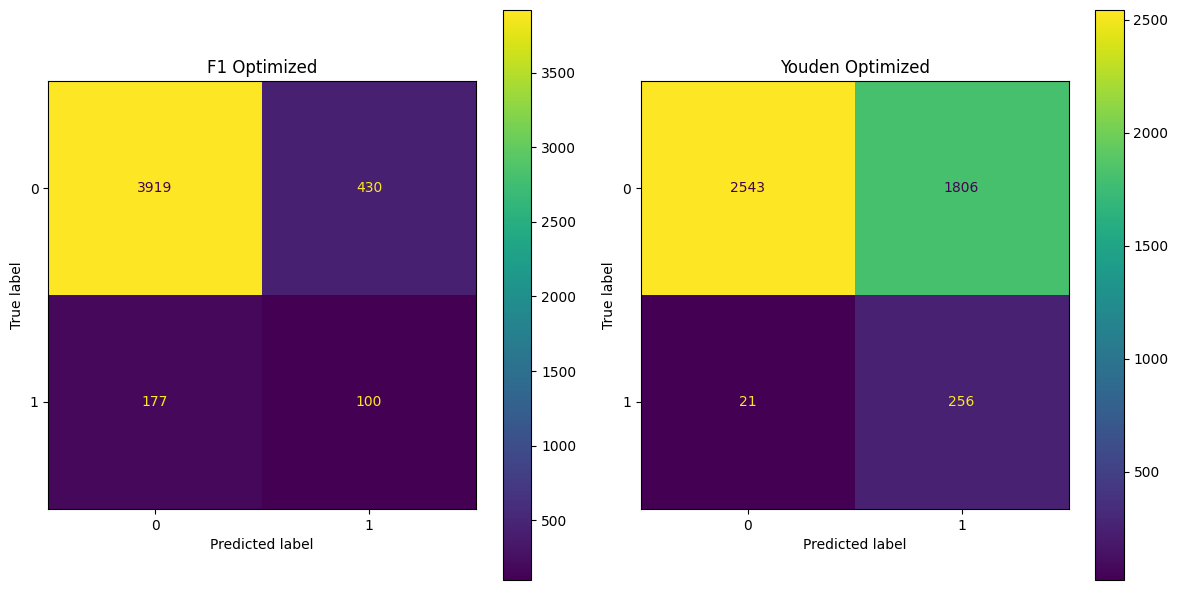

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

ConfusionMatrixDisplay(confusion_matrix(Y_test_sel,prediction(prob_sel,threshold[f1_threshold_index_sel]))).plot(ax=axs[0])
axs[0].set_title("F1 Optimized")

ConfusionMatrixDisplay(confusion_matrix(Y_test_sel,prediction(prob_sel,threshold[youden_threshold_index_sel]))).plot(ax=axs[1])
axs[1].set_title("Youden Optimized")

plt.tight_layout()
plt.show()

**Support Vector Machines(SVM)**

In [ ]:
from sklearn.svm import SVC

In [ ]:
from skopt import BayesSearchCV

In [ ]:
param_grid = {
    'C': np.logspace(-15, 5, base=2).tolist(),
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': np.logspace(-15, 5, base=2).tolist(),
    'degree': list(range(2,5))}

In [ ]:
svm=SVC()

In [ ]:
bayes_search=BayesSearchCV(svm,param_grid,cv=5,n_iter=20,n_jobs=-1)

In [ ]:
bayes_search.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BayesSearchCV(cv=5, estimator=SVC(), n_iter=20, n_jobs=-1,
              search_spaces={'C': [3.0517578125e-05, 4.049668286216296e-05,
                                   5.373890798677535e-05, 7.131127854200916e-05,
                                   9.46297317494329e-05, 0.00012557320965286584,
                                   0.00016663505952099585,
                                   0.0002211239414706804,
                                   0.00029343043193961284,
                                   0.0003893808052425849, 0.0005167065000353006,
                                   0.0006856670991072555, 0.000909877020...
                                       0.0021261350881830966,
                                       0.0028213712777467575,
                                       0.0037439464364876084,
                                       0.004968199339749013,
                                       0.006592777193318754,
                                       0.00874858437603264,
                                       0.011609330383882408,
                                       0.015405526902314075,
                                       0.02044306185543788, 0.02712784708210683,
                                       0.03599852568632797, 0.04776987453766537,
                                       0.06339039918545798, 0.08411876203952227,
                                       0.11162520220704067, ...],
                             'kernel': ['linear', 'rbf', 'poly', 'sigmoid']})

In [ ]:
params_svm=bayes_search.best_params_

In [ ]:
params_svm

OrderedDict([('C', 0.0006856670991072555),
             ('degree', 3),
             ('gamma', 0.11162520220704067),
             ('kernel', 'poly')])

In [ ]:
bayes_search.best_estimator_

SVC(C=0.0006856670991072555, gamma=0.11162520220704067, kernel='poly')

In [ ]:
svm_train=SVC(probability=True,max_iter=-1,**params_svm)

In [ ]:
svm_train.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=0.0006856670991072555, gamma=0.11162520220704067, kernel='poly',
    probability=True)

In [ ]:
Y_pred=svm_train.predict(X_test)

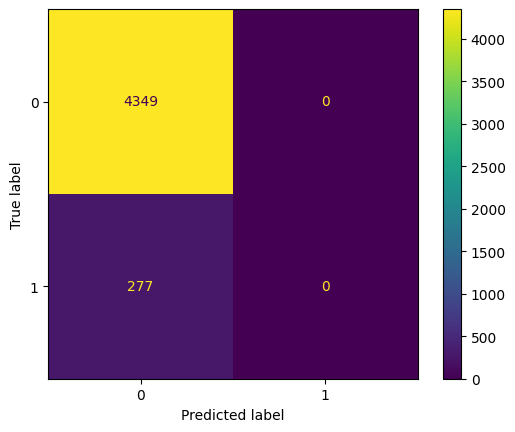

In [ ]:
ConfusionMatrixDisplay(confusion_matrix(Y_test,Y_pred)).plot()
plt.show()

In [ ]:
prob_svm=svm_train.predict_proba(X_test)

In [ ]:
f1_threshold_index_svm,best_f1_score_svm=best_f1(prob_svm)

In [ ]:
pred_svm=prediction(prob_svm,threshold[f1_threshold_index_svm])

In [ ]:
print(f"F1 optmized --> threshold:{threshold[f1_threshold_index_svm]},best f1 score:{best_f1_score_svm},accuracy:{accuracy_score(Y_test,prediction(prob_svm,threshold[f1_threshold_index_svm]))},\
youden score:{balanced_accuracy_score(Y_test,prediction(prob_svm,threshold[f1_threshold_index_svm]))},recall:{recall_score(Y_test,prediction(prob_svm,threshold[f1_threshold_index_svm]))}")

F1 optmized --> threshold:0.1,best f1 score:0.2188034188034188,accuracy:0.9012105490704713,youden score:0.5874710398589493,recall:0.23104693140794225


In [ ]:
youden_threshold_index_svm,best_youden_score_svm=best_youden(prob_svm)

In [ ]:
print(f"Youden optmized --> threshold:{threshold[youden_threshold_index_svm]},best youden score:{best_youden_score_svm},accuracy:{accuracy_score(Y_test,prediction(prob_svm,threshold[youden_threshold_index_svm]))},\
f1 score {f1_score(Y_test,prediction(prob_svm,threshold[youden_threshold_index_svm]))},recall:{recall_score(Y_test,prediction(prob_svm,threshold[youden_threshold_index_svm]))}")

Youden optmized --> threshold:0.05,best youden score:0.6664738065848574,accuracy:0.4682230869001297,f1 score 0.16723087339201084,recall:0.8916967509025271


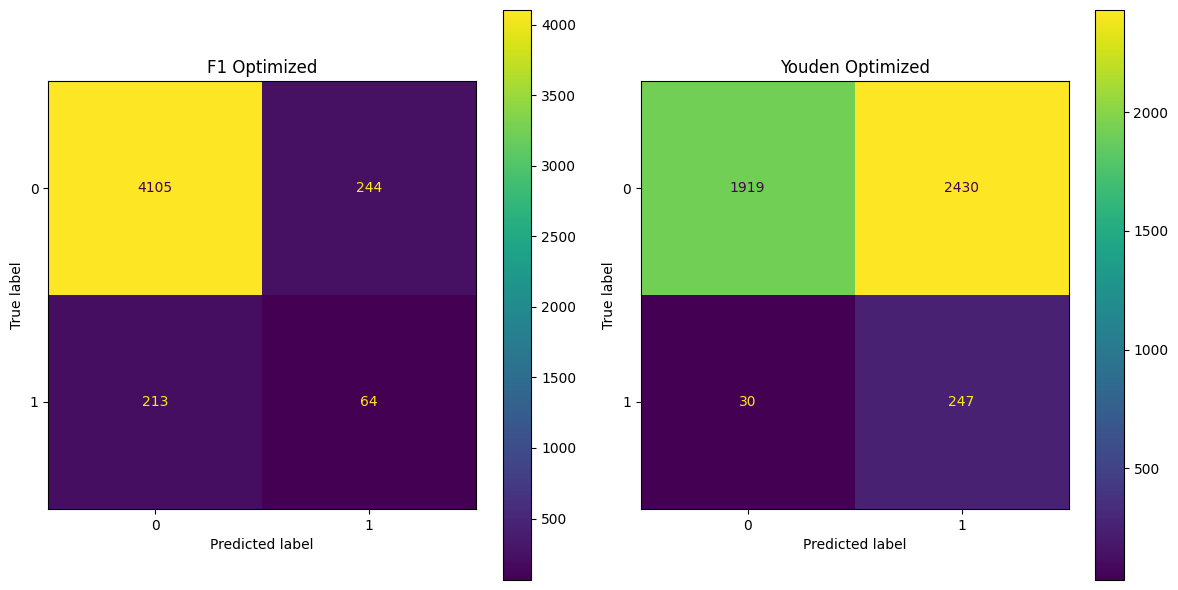

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

ConfusionMatrixDisplay(confusion_matrix(Y_test,prediction(prob_svm,threshold[f1_threshold_index_svm]))).plot(ax=axs[0])
axs[0].set_title("F1 Optimized")

ConfusionMatrixDisplay(confusion_matrix(Y_test,prediction(prob_svm,threshold[youden_threshold_index_svm]))).plot(ax=axs[1])
axs[1].set_title("Youden Optimized")

plt.tight_layout()
plt.show()

**With Selected features**

In [ ]:
from sklearn.svm import SVC

In [ ]:
from skopt import BayesSearchCV

In [ ]:
param_grid = {
    'C': np.logspace(-15, 5, base=2).tolist(),
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': np.logspace(-15, 5, base=2).tolist(),
    'degree': list(range(2,5))}

In [ ]:
svm_sel=SVC()

In [ ]:
bayes_search_svm_sel=BayesSearchCV(svm_sel,param_grid,cv=5,n_iter=15,n_jobs=-1)

In [ ]:
bayes_search_svm_sel.fit(X_train_sel,Y_train_sel)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BayesSearchCV(cv=5, estimator=SVC(), n_iter=15, n_jobs=-1,
              search_spaces={'C': [3.0517578125e-05, 4.049668286216296e-05,
                                   5.373890798677535e-05, 7.131127854200916e-05,
                                   9.46297317494329e-05, 0.00012557320965286584,
                                   0.00016663505952099585,
                                   0.0002211239414706804,
                                   0.00029343043193961284,
                                   0.0003893808052425849, 0.0005167065000353006,
                                   0.0006856670991072555, 0.000909877020...
                                       0.0021261350881830966,
                                       0.0028213712777467575,
                                       0.0037439464364876084,
                                       0.004968199339749013,
                                       0.006592777193318754,
                                       0.00874858437603264,
                                       0.011609330383882408,
                                       0.015405526902314075,
                                       0.02044306185543788, 0.02712784708210683,
                                       0.03599852568632797, 0.04776987453766537,
                                       0.06339039918545798, 0.08411876203952227,
                                       0.11162520220704067, ...],
                             'kernel': ['linear', 'rbf', 'poly', 'sigmoid']})

In [ ]:
params=bayes_search_svm_sel.best_params_

In [ ]:
svm_train_sel=SVC(probability=True, cache_size=2000, max_iter=-1, random_state=8356,**params)

In [ ]:
svm_train_sel.fit(X_train_sel,Y_train_sel)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=0.0028213712777467575, cache_size=2000, degree=2,
    gamma=0.015405526902314075, probability=True, random_state=8356)

In [ ]:
Y_pred_sel=svm_train_sel.predict(X_test_sel)

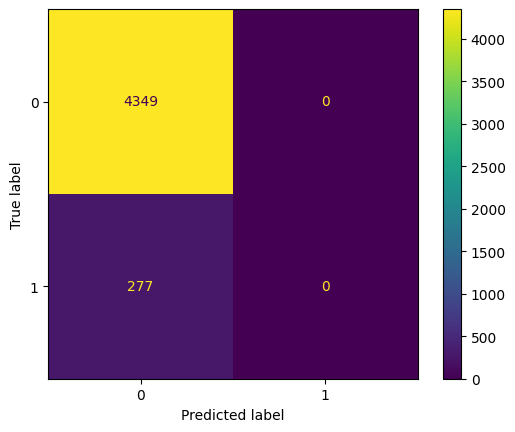

In [ ]:
ConfusionMatrixDisplay(confusion_matrix(Y_test_sel,Y_pred_sel)).plot()
plt.show()

In [ ]:
prob_svm_sel=svm_train_sel.predict_proba(X_test_sel)

In [ ]:
f1_threshold_index_svm_sel,best_f1_score_svm_sel=best_f1(prob_svm_sel)

In [ ]:
pred_svm_sel=prediction(prob_svm_sel,threshold[f1_threshold_index_svm_sel])

In [ ]:
print(f"F1 optmized --> threshold:{threshold[f1_threshold_index_svm_sel]},best f1 score:{best_f1_score_svm_sel},accuracy:{accuracy_score(Y_test,prediction(prob_svm_sel,threshold[f1_threshold_index_svm_sel]))},\
youden score:{balanced_accuracy_score(Y_test,prediction(prob_svm_sel,threshold[f1_threshold_index_svm_sel]))},recall:{recall_score(Y_test_sel,prediction(prob_svm_sel,threshold[f1_threshold_index_svm_sel]))}")

F1 optmized --> threshold:0.1,best f1 score:0.1694255111976631,accuracy:0.8156074362300043,youden score:0.5808152917845756,recall:0.3140794223826715


In [ ]:
youden_threshold_index_svm_sel,best_youden_score_svm_sel=best_youden(prob_svm_sel)

In [ ]:
print(f"Youden optmized --> threshold:{threshold[youden_threshold_index_svm_sel]},best youden score:{best_youden_score_svm_sel},accuracy:{accuracy_score(Y_test,prediction(prob_svm_sel,threshold[youden_threshold_index_svm_sel]))},\
f1 score {f1_score(Y_test,prediction(prob_svm_sel,threshold[youden_threshold_index_svm_sel]))},recall:{recall_score(Y_test_sel,prediction(prob_svm_sel,threshold[youden_threshold_index_svm_sel]))}")

Youden optmized --> threshold:0.1,best youden score:0.5808152917845756,accuracy:0.8156074362300043,f1 score 0.1694255111976631,recall:0.3140794223826715


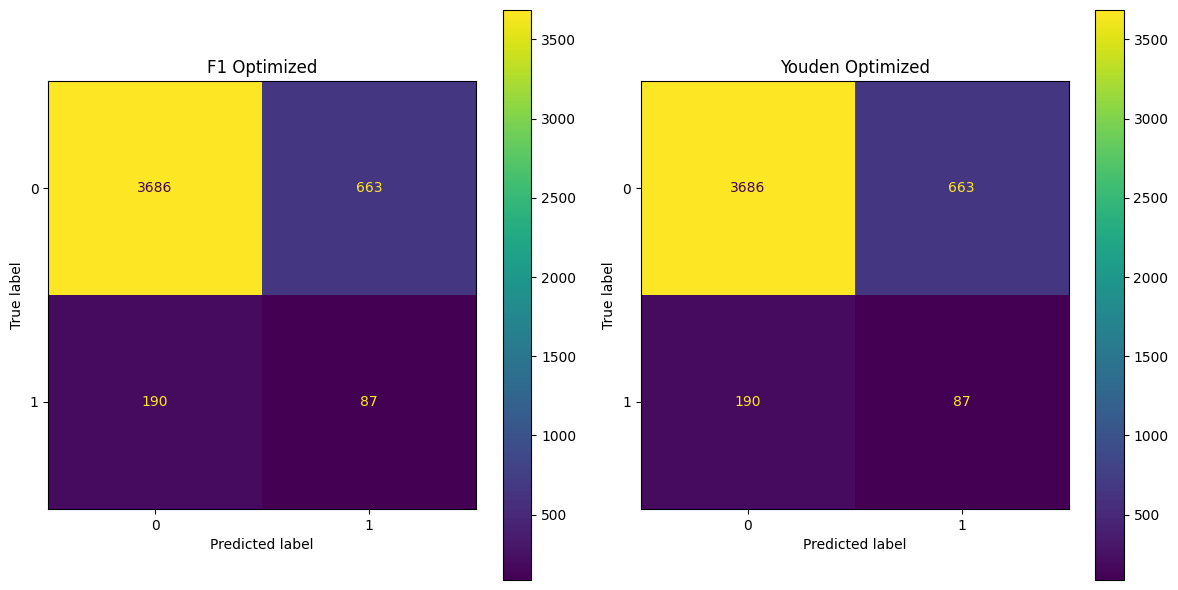

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

ConfusionMatrixDisplay(confusion_matrix(Y_test_sel,prediction(prob_svm_sel,threshold[f1_threshold_index_svm_sel]))).plot(ax=axs[0])
axs[0].set_title("F1 Optimized")

ConfusionMatrixDisplay(confusion_matrix(Y_test_sel,prediction(prob_svm_sel,threshold[youden_threshold_index_svm_sel]))).plot(ax=axs[1])
axs[1].set_title("Youden Optimized")

plt.tight_layout()
plt.show()

**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from skopt import BayesSearchCV

In [ ]:
rf=RandomForestClassifier()

In [ ]:
param_grid_rf={'n_estimators':list(range(100,4050,50)),
               'max_depth':list(range(2,20)),
               'ccp_alpha':[0.0, 0.1, 0.5, 0.01, 0.05, 0.001, 0.005, 0.0001, 0.0005]}

In [ ]:
bayes_search_rf=BayesSearchCV(rf,param_grid_rf,n_iter=5,n_jobs=-1)

In [ ]:
bayes_search_rf.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:909: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


BayesSearchCV(estimator=RandomForestClassifier(), n_iter=5, n_jobs=-1,
              search_spaces={'ccp_alpha': [0.0, 0.1, 0.5, 0.01, 0.05, 0.001,
                                           0.005, 0.0001, 0.0005],
                             'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                           13, 14, 15, 16, 17, 18, 19],
                             'n_estimators': [100, 150, 200, 250, 300, 350, 400,
                                              450, 500, 550, 600, 650, 700, 750,
                                              800, 850, 900, 950, 1000, 1050,
                                              1100, 1150, 1200, 1250, 1300,
                                              1350, 1400, 1450, 1500, 1550, ...]})

In [ ]:
bayes_search_rf.best_params_

OrderedDict([('ccp_alpha', 0.0001), ('max_depth', 18), ('n_estimators', 450)])

In [ ]:
params_rf=bayes_search_rf.best_params_

In [ ]:
rf_train=RandomForestClassifier(criterion="gini", max_features="sqrt", bootstrap=True, oob_score=True,
                                        random_state=216, n_jobs=-1,**params_rf)

In [ ]:
rf_train.fit(X_train,np.array(Y_train).ravel())

RandomForestClassifier(ccp_alpha=0.0001, max_depth=18, n_estimators=450,
                       n_jobs=-1, oob_score=True, random_state=216)

In [ ]:
Y_pred_rf=rf_train.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score,precision_recall_fscore_support,ConfusionMatrixDisplay,confusion_matrix,RocCurveDisplay,balanced_accuracy_score,f1_score,accuracy_score


In [ ]:
precision, recall, fscore, support = precision_recall_fscore_support(np.array(Y_test).ravel(), Y_pred_rf, average=None)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
for class_label in range(2):
    print(f"Class {class_label} - Precision: {precision[class_label]}, Recall: {recall[class_label]}, F1-score: {fscore[class_label]}, Support: {support[class_label]}")


Class 0 - Precision: 0.9401210549070471, Recall: 1.0, F1-score: 0.9691364902506964, Support: 4349
Class 1 - Precision: 0.0, Recall: 0.0, F1-score: 0.0, Support: 277


In [ ]:
print(f"youden score:{balanced_accuracy_score(Y_test,Y_pred_rf)}")

youden score:0.5


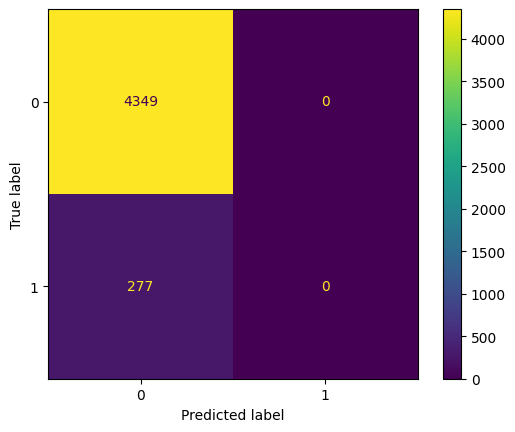

In [ ]:
ConfusionMatrixDisplay(confusion_matrix(Y_test,Y_pred_rf)).plot()
plt.show()

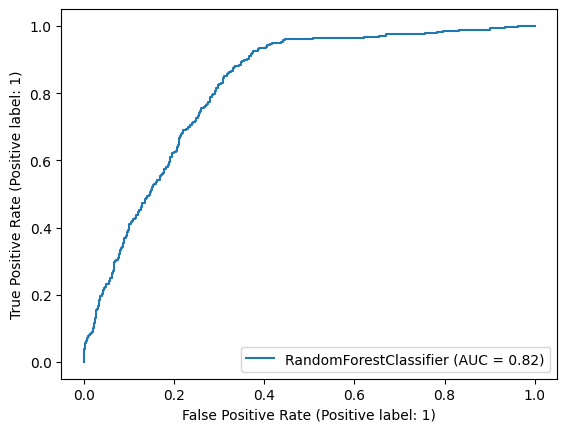

In [ ]:
RocCurveDisplay.from_estimator(rf_train,X_test,Y_test)
plt.show()

In [ ]:
prob_rf=rf_train.predict_proba(X_test)

In [ ]:
f1_threshold_index_rf,best_f1_score_rf=best_f1(prob_rf)

In [ ]:
pred_rf=prediction(prob_rf,threshold[f1_threshold_index_rf])

In [ ]:
print(f"F1 optmized --> threshold:{threshold[f1_threshold_index_rf]},best f1 score:{best_f1_score_rf},accuracy:{accuracy_score(Y_test,prediction(prob_rf,threshold[f1_threshold_index_rf]))},\
youden score:{balanced_accuracy_score(Y_test,prediction(prob_rf,threshold[f1_threshold_index_rf]))}")

F1 optmized --> threshold:0.1,best f1 score:0.2675343456254519,accuracy:0.7810203199308258,youden score:0.7280486073814222


In [ ]:
youden_threshold_index_rf,best_youden_score_rf=best_youden(prob_rf)

In [ ]:
print(f"Youden optmized --> threshold:{threshold[youden_threshold_index_rf]},best youden score:{best_youden_score_rf},accuracy:{accuracy_score(Y_test,prediction(prob_rf,threshold[youden_threshold_index_rf]))},\
f1 score {f1_score(Y_test,prediction(prob_rf,threshold[youden_threshold_index_rf]))}")

Youden optmized --> threshold:0.05,best youden score:0.7570585544790993,accuracy:0.5845222654561176,f1 score 0.21551020408163268


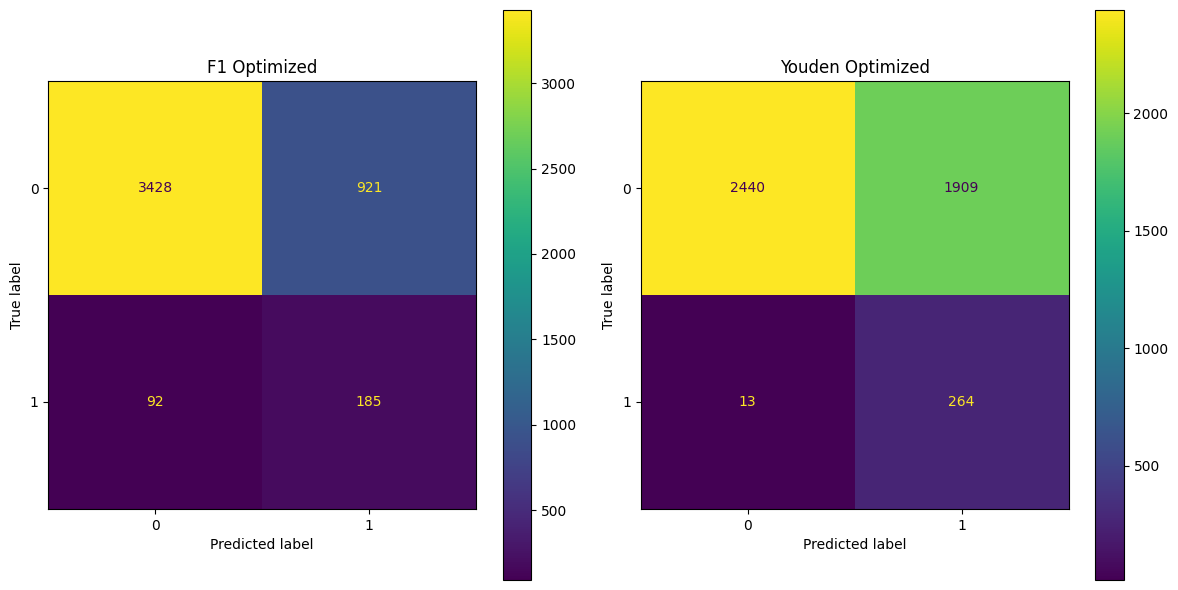

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

ConfusionMatrixDisplay(confusion_matrix(Y_test,prediction(prob_rf,threshold[f1_threshold_index_rf]))).plot(ax=axs[0])
axs[0].set_title("F1 Optimized")

ConfusionMatrixDisplay(confusion_matrix(Y_test,prediction(prob_rf,threshold[youden_threshold_index_rf]))).plot(ax=axs[1])
axs[1].set_title("Youden Optimized")

plt.tight_layout()
plt.show()

**With Selected features**


In [ ]:
rf_sel=RandomForestClassifier()

In [ ]:
param_grid_rf={'n_estimators':list(range(100,4050,50)),
               'max_depth':list(range(2,20)),
               'ccp_alpha':[0.0, 0.1, 0.5, 0.01, 0.05, 0.001, 0.005, 0.0001, 0.0005]}

In [ ]:
from skopt import BayesSearchCV

In [ ]:
bayes_search_rf_sel=BayesSearchCV(rf_sel,param_grid_rf,n_iter=15,n_jobs=-1)

In [ ]:
bayes_search_rf_sel.fit(X_train_sel,Y_train_sel)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:909: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


BayesSearchCV(estimator=RandomForestClassifier(), n_iter=15, n_jobs=-1,
              search_spaces={'ccp_alpha': [0.0, 0.1, 0.5, 0.01, 0.05, 0.001,
                                           0.005, 0.0001, 0.0005],
                             'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                           13, 14, 15, 16, 17, 18, 19],
                             'n_estimators': [100, 150, 200, 250, 300, 350, 400,
                                              450, 500, 550, 600, 650, 700, 750,
                                              800, 850, 900, 950, 1000, 1050,
                                              1100, 1150, 1200, 1250, 1300,
                                              1350, 1400, 1450, 1500, 1550, ...]})

In [ ]:
bayes_search_rf_sel.best_params_

OrderedDict([('ccp_alpha', 0.0), ('max_depth', 15), ('n_estimators', 2600)])

In [ ]:
params_rf_sel=bayes_search_rf_sel.best_params_

In [ ]:
rf_train_sel=RandomForestClassifier(criterion="gini", max_features="sqrt", bootstrap=True, oob_score=True,
                                        random_state=216, n_jobs=-1,**params_rf_sel)

In [ ]:
rf_train_sel.fit(X_train_sel,np.array(Y_train_sel).ravel())

RandomForestClassifier(max_depth=15, n_estimators=2600, n_jobs=-1,
                       oob_score=True, random_state=216)

In [ ]:
Y_pred_rf_sel=rf_train_sel.predict(X_test_sel)

In [ ]:
from sklearn.metrics import accuracy_score,precision_recall_fscore_support,ConfusionMatrixDisplay,confusion_matrix,RocCurveDisplay,balanced_accuracy_score,f1_score,accuracy_score,recall_score


In [ ]:
precision, recall, fscore, support = precision_recall_fscore_support(np.array(Y_test_sel).ravel(), Y_pred_rf_sel, average=None)


In [ ]:
for class_label in range(2):
    print(f"Class {class_label} - Precision: {precision[class_label]}, Recall: {recall[class_label]}, F1-score: {fscore[class_label]}, Support: {support[class_label]}")


Class 0 - Precision: 0.9423368740515933, Recall: 0.9995401241664751, F1-score: 0.9700959607230528, Support: 4349
Class 1 - Precision: 0.8461538461538461, Recall: 0.039711191335740074, F1-score: 0.07586206896551724, Support: 277


In [ ]:
print(f"youden score:{balanced_accuracy_score(Y_test_sel,Y_pred_rf_sel)}")

youden score:0.5196256577511076


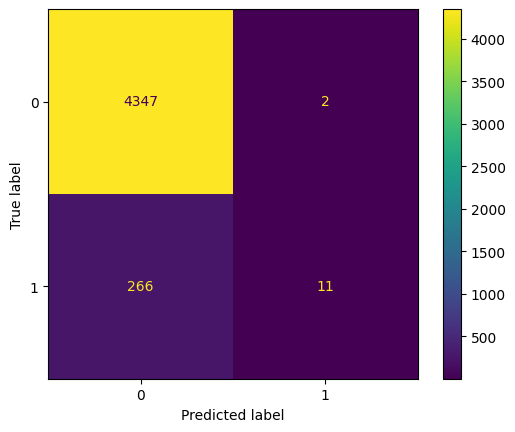

In [ ]:
ConfusionMatrixDisplay(confusion_matrix(Y_test_sel,Y_pred_rf_sel)).plot()
plt.show()

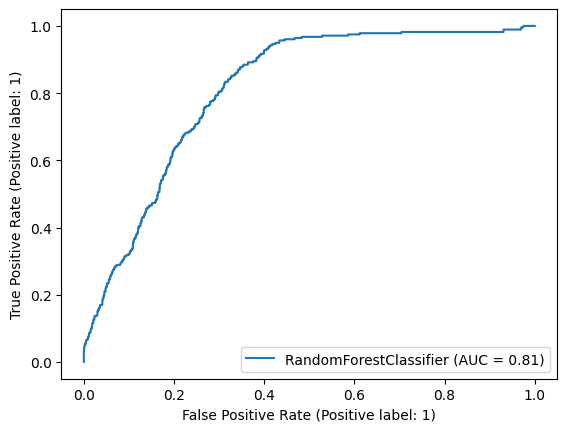

In [ ]:
RocCurveDisplay.from_estimator(rf_train_sel,X_test_sel,Y_test_sel)
plt.show()

**Threshold Optimization**

In [ ]:
prob_rf_sel=rf_train_sel.predict_proba(X_test_sel)

In [ ]:
f1_threshold_index_rf_sel,best_f1_score_rf_sel=best_f1(prob_rf_sel)

In [ ]:
pred_rf_sel=prediction(prob_rf_sel,threshold[f1_threshold_index_rf_sel])

In [ ]:
print(f"F1 optmized --> threshold:{threshold[f1_threshold_index_rf_sel]},best f1 score:{best_f1_score_rf_sel},accuracy:{accuracy_score(Y_test_sel,prediction(prob_rf_sel,threshold[f1_threshold_index_rf_sel]))},\
youden score:{balanced_accuracy_score(Y_test_sel,prediction(prob_rf_sel,threshold[f1_threshold_index_rf_sel]))},recall:{recall_score(Y_test_sel,prediction(prob_rf_sel,threshold[f1_threshold_index_rf_sel]))}")

F1 optmized --> threshold:0.1,best f1 score:0.25675675675675674,accuracy:0.7622135754431474,youden score:0.7264967339684711,recall:0.6859205776173285


In [ ]:
youden_threshold_index_rf_sel,best_youden_score_rf_sel=best_youden(prob_rf_sel)

In [ ]:
print(f"Youden optmized --> threshold:{threshold[youden_threshold_index_rf_sel]},best youden score:{best_youden_score_rf_sel},accuracy:{accuracy_score(Y_test_sel,prediction(prob_rf_sel,threshold[youden_threshold_index_rf_sel]))},\
f1 score {f1_score(Y_test_sel,prediction(prob_rf_sel,threshold[youden_threshold_index_rf_sel]))},recall:{recall_score(Y_test_sel,prediction(prob_rf_sel,threshold[youden_threshold_index_rf_sel]))}")

Youden optmized --> threshold:0.05,best youden score:0.757483981130149,accuracy:0.5821444012105491,f1 score 0.2151847340641494,recall:0.9566787003610109


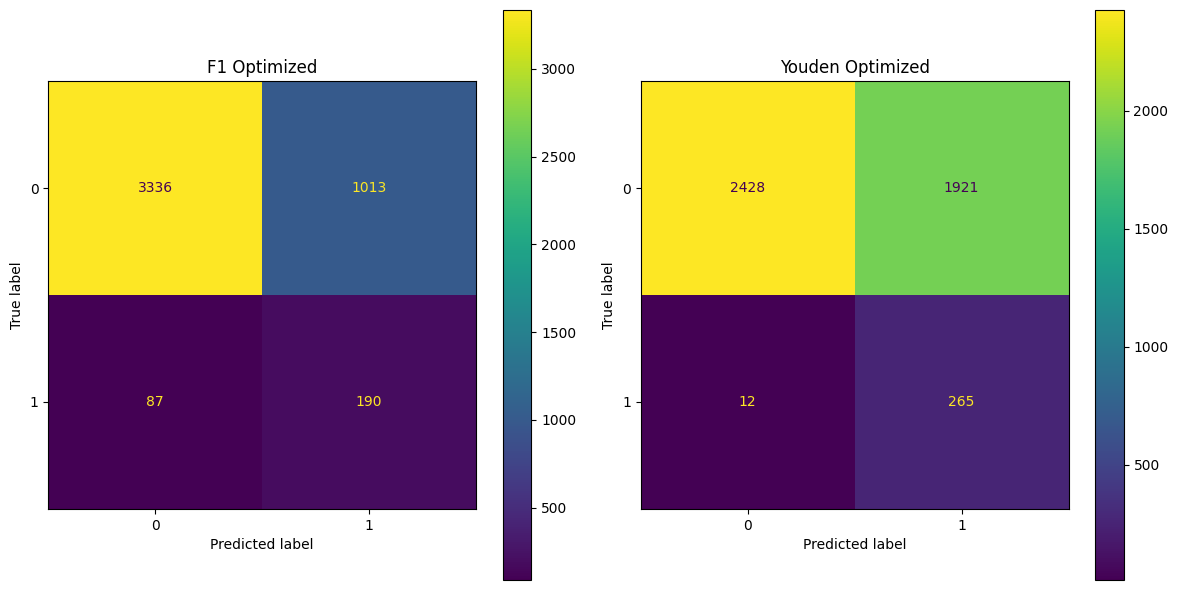

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

ConfusionMatrixDisplay(confusion_matrix(Y_test_sel,prediction(prob_rf_sel,threshold[f1_threshold_index_rf_sel]))).plot(ax=axs[0])
axs[0].set_title("F1 Optimized")

ConfusionMatrixDisplay(confusion_matrix(Y_test_sel,prediction(prob_rf_sel,threshold[youden_threshold_index_rf_sel]))).plot(ax=axs[1])
axs[1].set_title("Youden Optimized")

plt.tight_layout()
plt.show()

**XG Boost**

In [ ]:
import xgboost as xg

In [ ]:
xg_model=xg.XGBClassifier()

In [ ]:
from skopt import BayesSearchCV

In [ ]:
param_space_xg={'learning_rate':[0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5],
                'n_estimators':list(range(100,2050,50)),
                'max_depth':list(range(2,21)),
                'gamma':[i/10 for i in range(0,10)],
                'colsample_bytree':[i/10.0 for i in range(3,11)],
                'subsample':[i/10.0 for i in range(6,11)],
                'reg_alpha':[0.0001, 0.001, 0.01, 0.1, 1, 10, 50, 100],
                'reg_lambda':[0.0001, 0.001, 0.01, 0.1, 1, 10, 50, 100, 200, 300, 400, 500]}


In [ ]:
bayes_search_xg=BayesSearchCV(xg_model,param_space_xg,n_iter=5,n_jobs=-1)

In [ ]:
bayes_search_xg.fit(X_train,Y_train)

BayesSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                      callbacks=None, colsample_bylevel=None,
                                      colsample_bynode=None,
                                      colsample_bytree=None,
                                      early_stopping_rounds=None,
                                      enable_categorical=False,
                                      eval_metric=None, feature_types=None,
                                      gamma=None, gpu_id=None, grow_policy=None,
                                      importance_type=None,
                                      interaction_constraints=None,
                                      learning_rate=None, max_...
                             'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                           13, 14, 15, 16, 17, 18, 19, 20],
                             'n_estimators': [100, 150, 200, 250, 300, 350, 400,
                                              450, 500, 550, 600, 650, 700, 750,
                                              800, 850, 900, 950, 1000, 1050,
                                              1100, 1150, 1200, 1250, 1300,
                                              1350, 1400, 1450, 1500, 1550, ...],
                             'reg_alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 50,
                                           100],
                             'reg_lambda': [0.0001, 0.001, 0.01, 0.1, 1, 10, 50,
                                            100, 200, 300, 400, 500],
                             'subsample': [0.6, 0.7, 0.8, 0.9, 1.0]})

In [ ]:
bayes_search_xg.best_params_

OrderedDict([('colsample_bytree', 0.3),
             ('gamma', 0.8),
             ('learning_rate', 0.1),
             ('max_depth', 5),
             ('n_estimators', 150),
             ('reg_alpha', 0.001),
             ('reg_lambda', 200.0),
             ('subsample', 1.0)])

In [ ]:
params_xg=bayes_search_xg.best_params_

In [ ]:
xg_model_train=xg.XGBClassifier(booster="gbtree", objective="binary:logistic", grow_policy="lossguide",
                                n_jobs=-1, random_state=96, **params_xg)

In [ ]:
xg_model_train.fit(X_train,Y_train)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.3, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.8, gpu_id=None, grow_policy='lossguide',
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=150, n_jobs=-1,
              num_parallel_tree=None, predictor=None, random_state=96, ...)

In [ ]:
Y_pred_xg=xg_model_train.predict(X_test)

In [ ]:
accuracy_score(Y_test,Y_pred_xg)

0.9401210549070471

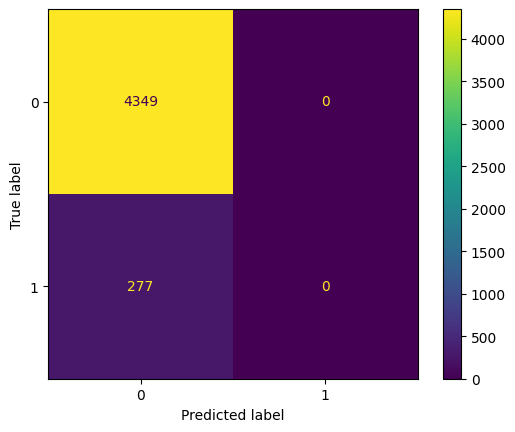

In [ ]:
ConfusionMatrixDisplay(confusion_matrix(Y_test,Y_pred_xg)).plot()
plt.show()

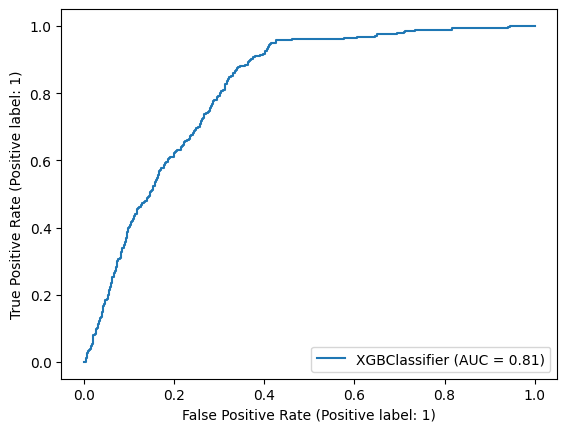

In [ ]:
RocCurveDisplay.from_estimator(xg_model_train,X_test,Y_test)

**Threshold Optimization**

In [ ]:
prob_xg=xg_model_train.predict_proba(X_test)

In [ ]:
f1_threshold_index_xg,best_f1_score_xg=best_f1(prob_xg)

In [ ]:
pred_xg=prediction(prob_xg,threshold[f1_threshold_index_xg])

In [ ]:
print(f"F1 optmized --> threshold:{threshold[f1_threshold_index_xg]},best f1 score:{best_f1_score_xg},accuracy:{accuracy_score(Y_test,prediction(prob_xg,threshold[f1_threshold_index_xg]))},\
youden score:{balanced_accuracy_score(Y_test,prediction(prob_xg,threshold[f1_threshold_index_xg]))}")

F1 optmized --> threshold:0.1,best f1 score:0.24675324675324678,accuracy:0.7492434068309555,youden score:0.7195985964655969


In [ ]:
youden_threshold_index_xg,best_youden_score_xg=best_youden(prob_xg)

In [ ]:
print(f"Youden optmized --> threshold:{threshold[youden_threshold_index_xg]},best youden score:{best_youden_score_xg},accuracy:{accuracy_score(Y_test,prediction(prob_xg,threshold[youden_threshold_index_xg]))},\
f1 score {f1_score(Y_test,prediction(prob_xg,threshold[youden_threshold_index_xg]))}")

Youden optmized --> threshold:0.05,best youden score:0.7624276463405422,accuracy:0.5914396887159533,f1 score 0.2190082644628099


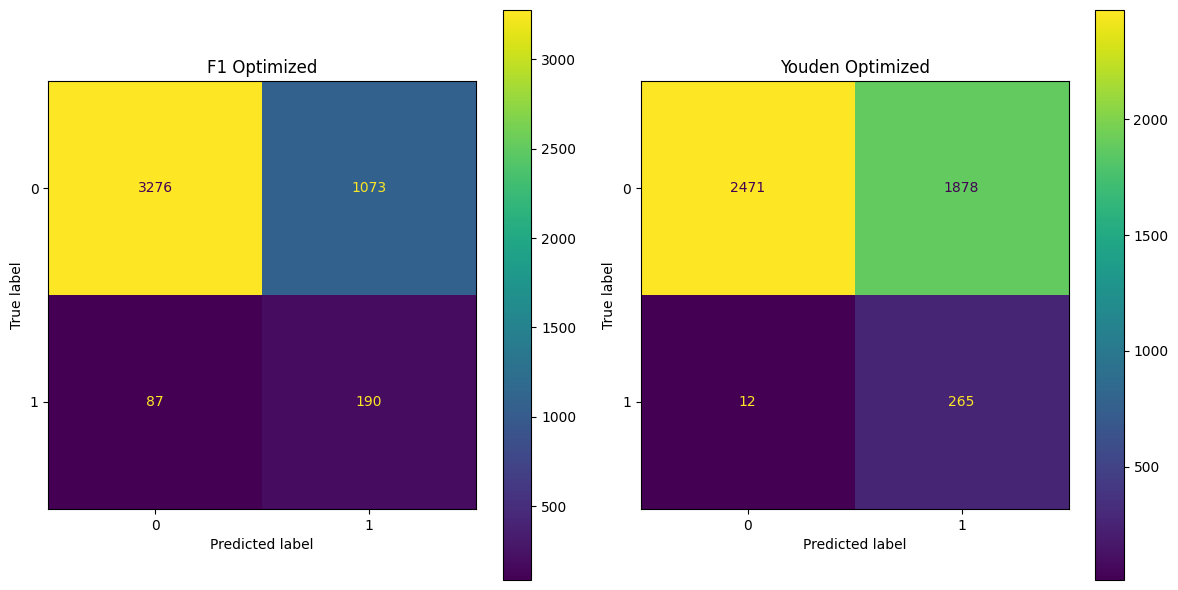

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

ConfusionMatrixDisplay(confusion_matrix(Y_test,prediction(prob_xg,threshold[f1_threshold_index_xg]))).plot(ax=axs[0])
axs[0].set_title("F1 Optimized")

ConfusionMatrixDisplay(confusion_matrix(Y_test,prediction(prob_xg,threshold[youden_threshold_index_xg]))).plot(ax=axs[1])
axs[1].set_title("Youden Optimized")

plt.tight_layout()
plt.show()

**With Selected features**

In [ ]:
xg_model_sel=xg.XGBClassifier()

In [ ]:
bayes_search_xg_sel=BayesSearchCV(xg_model_sel,param_space_xg,n_jobs=-1,n_iter=5)

In [ ]:
bayes_search_xg_sel.fit(X_train_sel,Y_train_sel)

BayesSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                      callbacks=None, colsample_bylevel=None,
                                      colsample_bynode=None,
                                      colsample_bytree=None,
                                      early_stopping_rounds=None,
                                      enable_categorical=False,
                                      eval_metric=None, feature_types=None,
                                      gamma=None, gpu_id=None, grow_policy=None,
                                      importance_type=None,
                                      interaction_constraints=None,
                                      learning_rate=None, max_...
                             'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                           13, 14, 15, 16, 17, 18, 19, 20],
                             'n_estimators': [100, 150, 200, 250, 300, 350, 400,
                                              450, 500, 550, 600, 650, 700, 750,
                                              800, 850, 900, 950, 1000, 1050,
                                              1100, 1150, 1200, 1250, 1300,
                                              1350, 1400, 1450, 1500, 1550, ...],
                             'reg_alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 50,
                                           100],
                             'reg_lambda': [0.0001, 0.001, 0.01, 0.1, 1, 10, 50,
                                            100, 200, 300, 400, 500],
                             'subsample': [0.6, 0.7, 0.8, 0.9, 1.0]})

In [ ]:
bayes_search_xg_sel.best_score_

0.9407077556672695

In [ ]:
bayes_search_xg_sel.best_params_

OrderedDict([('colsample_bytree', 0.4),
             ('gamma', 0.2),
             ('learning_rate', 0.0005),
             ('max_depth', 16),
             ('n_estimators', 250),
             ('reg_alpha', 0.001),
             ('reg_lambda', 0.0001),
             ('subsample', 0.9)])

In [ ]:
params_xg_sel=bayes_search_xg_sel.best_params_

In [ ]:
xg_model_train_sel=xg.XGBClassifier(booster="gbtree", objective="binary:logistic", grow_policy="lossguide",
                                n_jobs=-1, random_state=96, **params_xg_sel)

In [ ]:
xg_model_train_sel.fit(X_train_sel,Y_train_sel)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.4, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.2, gpu_id=None, grow_policy='lossguide',
              importance_type=None, interaction_constraints=None,
              learning_rate=0.0005, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=16,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=250, n_jobs=-1,
              num_parallel_tree=None, predictor=None, random_state=96, ...)

In [ ]:
Y_pred_xg_sel=xg_model_train_sel.predict(X_test_sel)

In [ ]:
accuracy_score(Y_test_sel,Y_pred_xg_sel)

0.9416342412451362

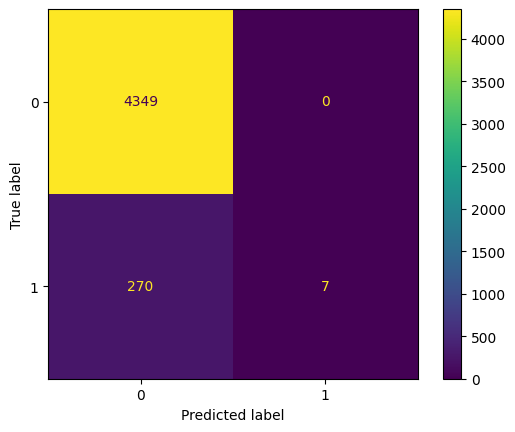

In [ ]:
ConfusionMatrixDisplay(confusion_matrix(Y_test_sel,Y_pred_xg_sel)).plot()
plt.show()

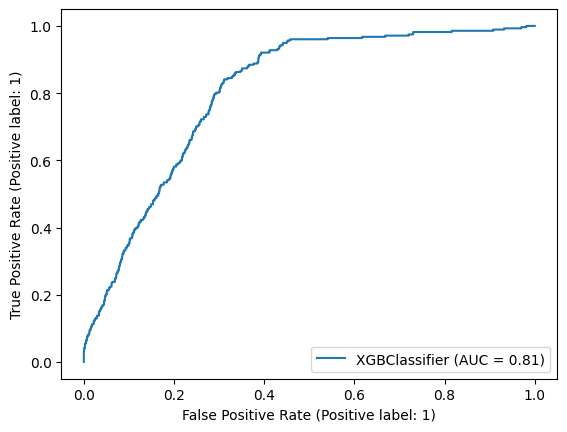

In [ ]:
RocCurveDisplay.from_estimator(xg_model_train_sel,X_test_sel,Y_test_sel)

**Threshold Optimization**



In [ ]:
prob_xg_sel=xg_model_train_sel.predict_proba(X_test_sel)

In [ ]:
f1_threshold_index_xg_sel,best_f1_score_xg_sel=best_f1(prob_xg_sel)

In [ ]:
pred_xg=prediction(prob_xg_sel,threshold[f1_threshold_index_xg_sel])

In [ ]:
print(f"F1 optmized --> threshold:{threshold[f1_threshold_index_xg_sel]},best f1 score:{best_f1_score_xg_sel},accuracy:{accuracy_score(Y_test,prediction(prob_xg_sel,threshold[f1_threshold_index_xg_sel]))},\
youden score:{balanced_accuracy_score(Y_test_sel,prediction(prob_xg_sel,threshold[f1_threshold_index_xg_sel]))},recall:{recall_score(Y_test_sel,prediction(prob_xg_sel,threshold[f1_threshold_index_xg_sel]))}")

F1 optmized --> threshold:0.45,best f1 score:0.2401614530776993,accuracy:0.6744487678339819,youden score:0.7609434261413679,recall:0.8592057761732852


In [ ]:
youden_threshold_index_xg_sel,best_youden_score_xg_sel=best_youden(prob_xg_sel)

In [ ]:
print(f"Youden optmized --> threshold:{threshold[youden_threshold_index_xg_sel]},best youden score:{best_youden_score_xg_sel},accuracy:{accuracy_score(Y_test_sel,prediction(prob_xg_sel,threshold[youden_threshold_index_xg_sel]))},\
f1 score {f1_score(Y_test_sel,prediction(prob_xg_sel,threshold[youden_threshold_index_xg_sel]))},recall:{recall_score(Y_test_sel,prediction(prob_xg_sel,threshold[youden_threshold_index_xg_sel]))}")

Youden optmized --> threshold:0.45,best youden score:0.7609434261413679,accuracy:0.6744487678339819,f1 score 0.2401614530776993,,recall:0.8592057761732852


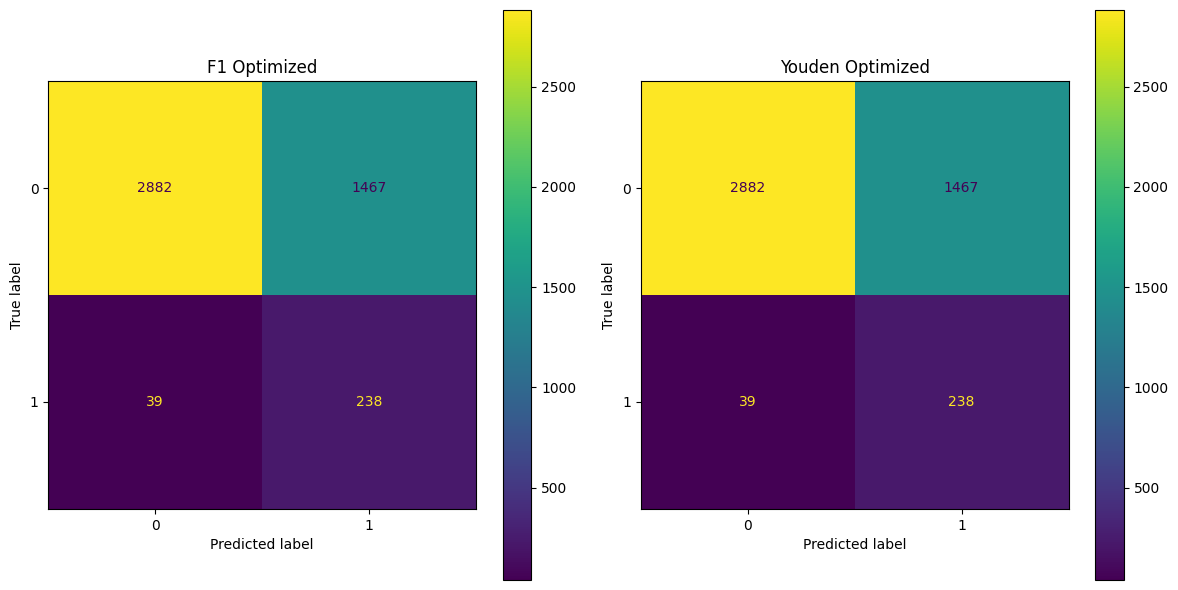

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

ConfusionMatrixDisplay(confusion_matrix(Y_test_sel,prediction(prob_xg_sel,threshold[f1_threshold_index_xg_sel]))).plot(ax=axs[0])
axs[0].set_title("F1 Optimized")

ConfusionMatrixDisplay(confusion_matrix(Y_test_sel,prediction(prob_xg_sel,threshold[youden_threshold_index_xg_sel]))).plot(ax=axs[1])
axs[1].set_title("Youden Optimized")

plt.tight_layout()
plt.show()